# fog 2 data topology analysis

In [2]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
from seaborn import *

In [3]:
data1 = read_csv ('C:\\Users\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_5.csv')
data1.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.0,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.0,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.0,65.000035
3,12,COMP_M,app1,Mod1,M.sens,22,54,78,23,Sensor,16.000000,68.000033,84.000033,50.0,68.000033
4,6,COMP_M,app1,Mod1,M.sens,10,53,66,15,Sensor,16.000000,68.000035,84.000035,50.0,68.000035


In [4]:
df1 = DataFrame (data1)

In [5]:
df1

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.000000,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.000000,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
3,12,COMP_M,app1,Mod1,M.sens,22,54,78,23,Sensor,16.000000,68.000033,84.000033,50.000000,68.000033
4,6,COMP_M,app1,Mod1,M.sens,10,53,66,15,Sensor,16.000000,68.000035,84.000035,50.000000,68.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,156,SINK_M,app1,Actuator,M.result1,53,1,15,57,Mod1,0.000000,1995.666891,1995.666891,384.000035,1995.666891
855,470,COMP_M,app1,Mod1,M.sens,38,50,94,4,Sensor,0.001000,1996.000418,1996.001418,950.000000,1996.000418
856,954,COMP_M,app1,Mod1,M.sens,6,52,62,0,Sensor,10.666667,1997.000032,2007.666699,1950.000000,1968.000040
857,975,COMP_M,app1,Mod1,M.sens,48,56,104,30,Sensor,8.000000,1997.000032,2005.000032,1950.000000,1968.000043


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              859 non-null    int64  
 1   type            859 non-null    object 
 2   app             859 non-null    object 
 3   module          859 non-null    object 
 4   message         859 non-null    object 
 5   DES.src         859 non-null    int64  
 6   DES.dst         859 non-null    int64  
 7   TOPO.src        859 non-null    int64  
 8   TOPO.dst        859 non-null    int64  
 9   module.src      859 non-null    object 
 10  service         859 non-null    float64
 11  time_in         859 non-null    float64
 12  time_out        859 non-null    float64
 13  time_emit       859 non-null    float64
 14  time_reception  859 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 100.8+ KB


In [7]:
df1.describe()

,id,DES.src,DES.dst,TOPO.src,TOPO.dst,service,time_in,time_out,time_emit,time_reception
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,416.506403,29.107101,45.967404,70.031432,23.792782,8.596121,1034.613182,1043.209303,864.453636,1023.634918
std,288.706852,17.727415,18.911310,30.290439,17.754185,5.337155,560.522023,560.421721,571.024845,560.752737
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,65.000032,73.000032,50.000000,65.000032
25%,153.000000,12.000000,52.000000,60.000000,4.000000,8.000000,551.333391,557.666700,350.000000,548.166746
50%,380.000000,32.000000,53.000000,76.000000,26.000000,10.666667,1031.000032,1036.333368,800.000000,1018.000040
75%,657.500000,44.000000,55.000000,92.000000,30.000000,10.666667,1518.000040,1528.166773,1350.000000,1515.000036
max,975.000000,56.000000,56.000000,104.000000,57.000000,16.000000,1997.000035,2007.666701,1950.000000,1996.000418


In [8]:
time_in = df1 ['time_in'].tolist()

In [9]:
mean_time_in = sum (time_in) // len (time_in)

# Time in

In [10]:
time_in

[65.00003203003003,
 65.00003212048193,
 65.00003467973856,
 68.00003253435115,
 68.00003484072249,
 73.00003212048193,
 75.6666986966967,
 75.66670134640523,
 81.00003212048193,
 84.00003253435115,
 84.00003484072249,
 86.33336536336337,
 86.3333680130719,
 89.00003212048193,
 90.6667002981982,
 97.00003203003004,
 97.00003212048192,
 97.00003467973858,
 100.00003253435116,
 100.00003484072248,
 105.6667017996997,
 107.66669869669671,
 107.66670134640523,
 115.00003212048192,
 118.00003484072248,
 118.00004529004327,
 118.33336536336338,
 118.33336801307192,
 120.6667033012012,
 123.00003212048192,
 129.00003203003004,
 129.00003467973858,
 131.00003212048193,
 135.6667048027027,
 139.00003212048193,
 139.6666986966967,
 139.66670134640523,
 147.00003212048193,
 150.6667063042042,
 164.00007252507052,
 165.00003203003,
 165.00003212048193,
 165.00003467973855,
 165.66670780570573,
 168.0000325343511,
 168.0000348407225,
 173.00003212048193,
 175.66669869669667,
 175.6667013464052,
 18

# mean time in

In [11]:
print ('mean time in: ', mean_time_in)

mean time in:  1034.0


In [12]:
time_out = df1 ['time_out'].tolist()

In [13]:
time_out

[75.6666986966967,
 73.00003212048193,
 75.66670134640523,
 84.00003253435115,
 84.00003484072249,
 81.00003212048193,
 86.33336536336337,
 86.3333680130719,
 89.00003212048193,
 100.00003253435116,
 100.00003484072248,
 97.00003203003004,
 97.00003467973858,
 97.00003212048192,
 90.6667002981982,
 107.66669869669671,
 105.00003212048192,
 107.66670134640523,
 116.00003253435116,
 116.00003484072248,
 105.6667017996997,
 118.33336536336338,
 118.33336801307192,
 123.00003212048192,
 134.0000348407225,
 134.0000452900433,
 129.00003203003004,
 129.00003467973858,
 120.6667033012012,
 131.00003212048193,
 139.6666986966967,
 139.66670134640523,
 139.00003212048193,
 135.6667048027027,
 147.00003212048193,
 150.33336536336336,
 150.3333680130719,
 155.00003212048193,
 150.6667063042042,
 164.00107252507053,
 175.66669869669667,
 173.00003212048193,
 175.6667013464052,
 165.66670780570573,
 184.00003253435116,
 184.0000348407225,
 181.00003212048196,
 186.33336536336333,
 186.3333680130718

In [14]:
mean_time_out = sum (time_out) // len (time_out)

In [15]:
print ('Time out: ', mean_time_out)

Time out:  1043.0


In [16]:
time_reception = df1 ['time_reception'].tolist()

In [17]:
time_reception

[65.00003203003003,
 65.00003212048193,
 65.00003467973856,
 68.00003253435115,
 68.00003484072249,
 65.00003672222222,
 65.00003230303031,
 65.00003696503497,
 65.00004519654428,
 68.00004529004329,
 68.0000499616307,
 65.00003295975233,
 65.0000371493849,
 68.00003672222222,
 90.6667002981982,
 65.00005914285714,
 68.00004349377593,
 68.000046345898,
 68.00006082352941,
 68.000061347181,
 105.6667017996997,
 68.00004024091778,
 68.00005126108374,
 115.00003212048192,
 118.00003484072248,
 118.00004529004327,
 115.00003203003004,
 115.00003467973856,
 120.6667033012012,
 115.00003672222222,
 115.0000323030303,
 115.00003696503497,
 115.00004519654428,
 135.6667048027027,
 118.00003672222222,
 115.00003295975232,
 118.000046345898,
 118.00004349377592,
 150.6667063042042,
 164.00007252507052,
 165.00003203003,
 165.00003212048193,
 165.00003467973855,
 165.66670780570573,
 168.0000325343511,
 168.0000348407225,
 165.0000367222222,
 165.0000323030303,
 165.00003696503495,
 180.666709307

In [18]:
mean_time_reception = sum (time_reception) // len (time_reception)

In [19]:
print ('mean time reception :-', mean_time_reception)

mean time reception :- 1023.0


In [20]:
time_emit = df1 ['time_emit'].tolist()

In [21]:
time_emit

[50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 75.6666986966967,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 86.33336536336337,
 50.0,
 50.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 97.00003203003004,
 100.0,
 100.0,
 100.0,
 100.0,
 107.66669869669671,
 100.0,
 100.0,
 100.0,
 100.0,
 118.33336536336338,
 50.0,
 150.0,
 150.0,
 150.0,
 75.66670134640523,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 129.00003203003004,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 50.0,
 150.0,
 139.6666986966967,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 84.00003484072249,
 100.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 150.33336536336336,
 200.0,
 200.0,
 200.0,
 100.0,
 200.0,
 86.3333680130719,
 200.0,
 200.0,
 200.0,
 175.66669869669667,
 50.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 186.33336536336333,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 73.00003212048193,
 250.0,
 250.0,
 50.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.

In [22]:
mean_time_emit = sum (time_emit) // len (time_emit)

In [23]:
print ('time emit :-', mean_time_emit)

time emit :- 864.0


In [24]:
data = []
data.append ('time in')
data.append ('time out')
data.append ('time reception')
data.append ('time emit')
dataValue = []
dataValue.append (mean_time_in)
dataValue.append (mean_time_out)
dataValue.append (mean_time_reception)
dataValue.append (mean_time_emit)

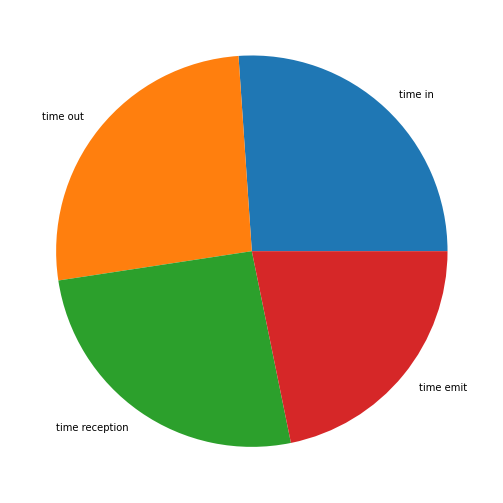

In [25]:
figure = plt.figure(figsize = (20, 9))
plt.pie (dataValue, labels = data)
plt.show ()

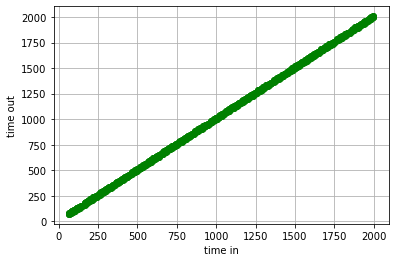

In [26]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

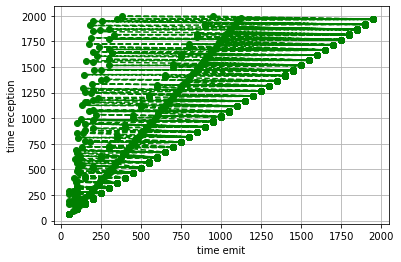

In [27]:
plt.plot (time_emit, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time emit')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

In [28]:
service = df1 ['service'].tolist()

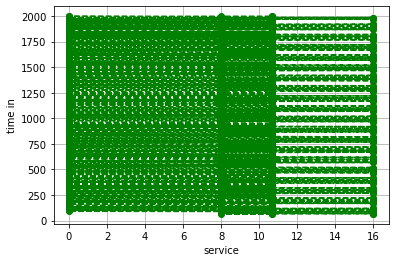

In [29]:
plt.plot (service, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

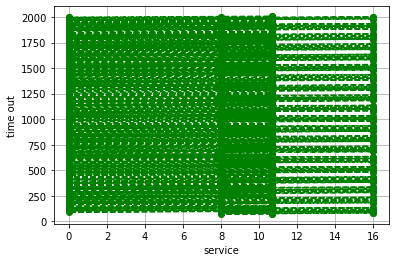

In [30]:
plt.plot (service, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

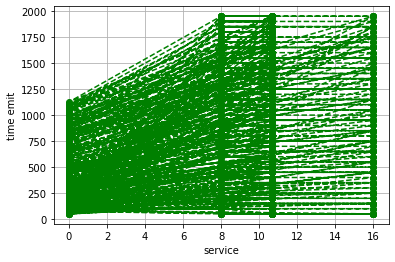

In [31]:
plt.plot (service, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

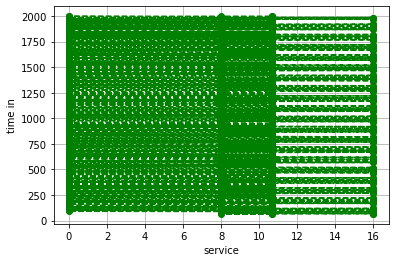

In [32]:
plt.plot (service, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

In [33]:
topo = df1 ['TOPO.src'].tolist()

In [34]:
topo

[56,
 96,
 88,
 78,
 66,
 98,
 58,
 86,
 102,
 76,
 70,
 60,
 94,
 100,
 0,
 64,
 104,
 90,
 80,
 68,
 0,
 62,
 92,
 96,
 66,
 76,
 56,
 88,
 0,
 98,
 58,
 86,
 102,
 0,
 100,
 60,
 90,
 104,
 0,
 84,
 56,
 96,
 88,
 26,
 78,
 66,
 98,
 58,
 86,
 0,
 102,
 76,
 70,
 60,
 90,
 72,
 100,
 0,
 62,
 104,
 92,
 80,
 68,
 15,
 94,
 56,
 96,
 88,
 66,
 76,
 98,
 58,
 86,
 0,
 102,
 60,
 90,
 64,
 100,
 26,
 62,
 104,
 92,
 0,
 82,
 56,
 96,
 88,
 78,
 66,
 0,
 98,
 58,
 86,
 102,
 76,
 70,
 30,
 60,
 90,
 74,
 100,
 62,
 104,
 92,
 80,
 68,
 0,
 92,
 56,
 96,
 88,
 0,
 66,
 76,
 98,
 58,
 86,
 15,
 102,
 60,
 90,
 62,
 100,
 0,
 62,
 104,
 92,
 0,
 56,
 96,
 88,
 78,
 66,
 98,
 58,
 86,
 26,
 102,
 76,
 70,
 72,
 60,
 90,
 100,
 0,
 62,
 104,
 92,
 80,
 68,
 0,
 94,
 56,
 96,
 88,
 66,
 76,
 30,
 98,
 58,
 86,
 102,
 0,
 64,
 60,
 90,
 100,
 62,
 104,
 92,
 0,
 56,
 96,
 88,
 15,
 78,
 66,
 98,
 58,
 86,
 0,
 102,
 76,
 70,
 74,
 60,
 90,
 100,
 0,
 62,
 104,
 92,
 80,
 68,
 26,
 94,
 56,
 96

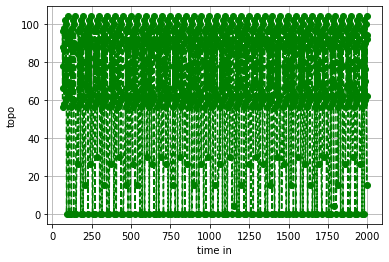

In [35]:
plt.plot (time_in, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

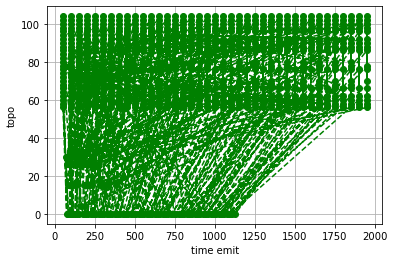

In [36]:
plt.plot (time_emit, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time emit')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

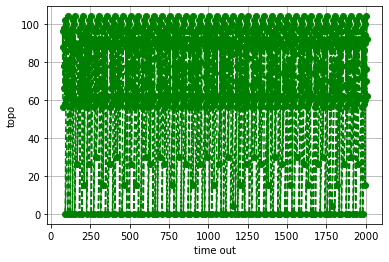

In [37]:
plt.plot (time_out, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time out')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

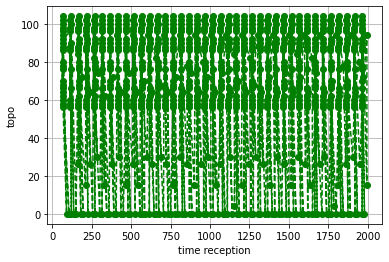

In [38]:
plt.plot (time_reception, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time reception')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

In [39]:
des = df1 ['DES.src'].tolist ()
des

[0,
 40,
 32,
 22,
 10,
 42,
 2,
 30,
 46,
 20,
 14,
 4,
 38,
 44,
 52,
 8,
 48,
 34,
 24,
 12,
 52,
 6,
 36,
 40,
 10,
 20,
 0,
 32,
 52,
 42,
 2,
 30,
 46,
 52,
 44,
 4,
 34,
 48,
 52,
 28,
 0,
 40,
 32,
 55,
 22,
 10,
 42,
 2,
 30,
 52,
 46,
 20,
 14,
 4,
 34,
 16,
 44,
 52,
 6,
 48,
 36,
 24,
 12,
 53,
 38,
 0,
 40,
 32,
 10,
 20,
 42,
 2,
 30,
 52,
 46,
 4,
 34,
 8,
 44,
 55,
 6,
 48,
 36,
 52,
 26,
 0,
 40,
 32,
 22,
 10,
 52,
 42,
 2,
 30,
 46,
 20,
 14,
 56,
 4,
 34,
 18,
 44,
 6,
 48,
 36,
 24,
 12,
 52,
 36,
 0,
 40,
 32,
 52,
 10,
 20,
 42,
 2,
 30,
 53,
 46,
 4,
 34,
 6,
 44,
 52,
 6,
 48,
 36,
 52,
 0,
 40,
 32,
 22,
 10,
 42,
 2,
 30,
 55,
 46,
 20,
 14,
 16,
 4,
 34,
 44,
 52,
 6,
 48,
 36,
 24,
 12,
 52,
 38,
 0,
 40,
 32,
 10,
 20,
 56,
 42,
 2,
 30,
 46,
 52,
 8,
 4,
 34,
 44,
 6,
 48,
 36,
 52,
 0,
 40,
 32,
 53,
 22,
 10,
 42,
 2,
 30,
 52,
 46,
 20,
 14,
 18,
 4,
 34,
 44,
 52,
 6,
 48,
 36,
 24,
 12,
 55,
 38,
 0,
 40,
 32,
 10,
 20,
 42,
 2,
 30,
 52,
 46,
 8,
 4

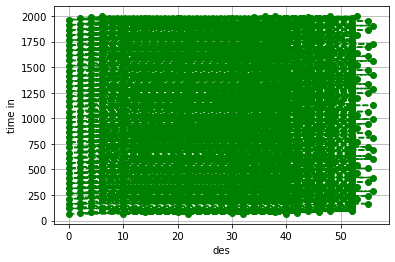

In [40]:
plt.plot (des, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

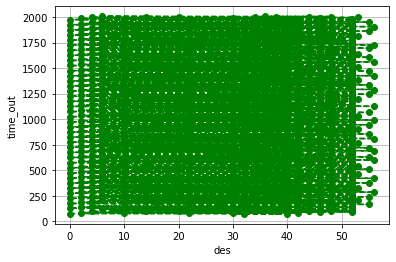

In [41]:
plt.plot (des, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time_out')
plt.grid (True)
plt.show ()

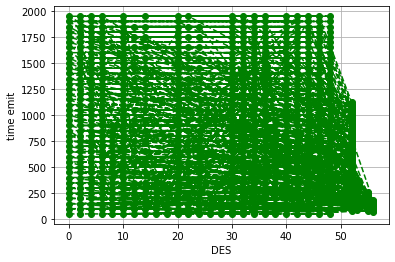

In [42]:
plt.plot (des, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('DES')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

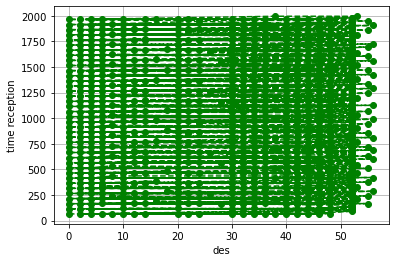

In [43]:
plt.plot (des, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

In [44]:
des_dst = df1 ['DES.dst'].tolist ()
des_dst

[52,
 56,
 55,
 54,
 53,
 56,
 52,
 55,
 56,
 54,
 53,
 52,
 55,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 52,
 55,
 56,
 53,
 54,
 52,
 55,
 1,
 56,
 52,
 55,
 56,
 1,
 56,
 52,
 55,
 56,
 1,
 50,
 52,
 56,
 55,
 1,
 54,
 53,
 56,
 52,
 55,
 1,
 56,
 54,
 53,
 52,
 55,
 50,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 53,
 54,
 56,
 52,
 55,
 1,
 56,
 52,
 55,
 50,
 56,
 1,
 52,
 56,
 55,
 1,
 50,
 52,
 56,
 55,
 54,
 53,
 1,
 56,
 52,
 55,
 56,
 54,
 53,
 1,
 52,
 55,
 50,
 56,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 1,
 53,
 54,
 56,
 52,
 55,
 1,
 56,
 52,
 55,
 50,
 56,
 1,
 52,
 56,
 55,
 1,
 52,
 56,
 55,
 54,
 53,
 56,
 52,
 55,
 1,
 56,
 54,
 53,
 50,
 52,
 55,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 53,
 54,
 1,
 56,
 52,
 55,
 56,
 1,
 50,
 52,
 55,
 56,
 52,
 56,
 55,
 1,
 52,
 56,
 55,
 1,
 54,
 53,
 56,
 52,
 55,
 1,
 56,
 54,
 53,
 50,
 52,
 55,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 53,
 54,
 56,
 52,
 55,
 1,


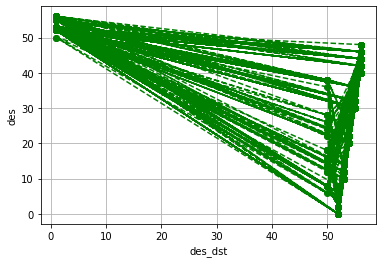

In [45]:
plt.plot (des_dst, des, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des_dst')
plt.ylabel ('des')
plt.grid (True)
plt.show ()

In [46]:
data2 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_6.csv')
data2.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,5,COMP_M,app1,Mod1,M.sens,9,62,70,0,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
1,19,COMP_M,app1,Mod1,M.sens,37,65,98,26,Sensor,10.666667,65.000035,75.666702,50.0,65.000035
2,25,COMP_M,app1,Mod1,M.sens,49,66,110,30,Sensor,8.000000,65.000036,73.000036,50.0,65.000036
3,13,COMP_M,app1,Mod1,M.sens,25,64,86,23,Sensor,16.000000,65.000038,81.000038,50.0,65.000038
4,8,COMP_M,app1,Mod1,M.sens,15,63,76,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053


In [47]:
df2 = DataFrame (data2)
df2

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,5,COMP_M,app1,Mod1,M.sens,9,62,70,0,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
1,19,COMP_M,app1,Mod1,M.sens,37,65,98,26,Sensor,10.666667,65.000035,75.666702,50.0,65.000035
2,25,COMP_M,app1,Mod1,M.sens,49,66,110,30,Sensor,8.000000,65.000036,73.000036,50.0,65.000036
3,13,COMP_M,app1,Mod1,M.sens,25,64,86,23,Sensor,16.000000,65.000038,81.000038,50.0,65.000038
4,8,COMP_M,app1,Mod1,M.sens,15,63,76,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,1161,COMP_M,app1,Mod1,M.sens,41,65,102,26,Sensor,10.666667,1997.000035,2007.666702,1950.0,1968.000036
933,1166,COMP_M,app1,Mod1,M.sens,51,66,112,30,Sensor,8.000000,1997.000036,2005.000036,1950.0,1968.000040
934,1155,COMP_M,app1,Mod1,M.sens,29,64,90,23,Sensor,16.000000,1997.000038,2013.000038,1950.0,1968.000054
935,1144,COMP_M,app1,Mod1,M.sens,7,62,68,0,Sensor,10.666667,1997.000040,2007.666706,1950.0,1968.000061


In [48]:
time_in = df2 ['time_in'].tolist ()
time_in

[65.00003436245954,
 65.00003516749585,
 65.00003612969283,
 65.00003816636529,
 65.0000525050505,
 73.00003612969283,
 75.66670102912622,
 75.66670183416252,
 81.00003612969283,
 81.00003816636529,
 81.0000525050505,
 86.33336769579289,
 86.3333685008292,
 89.00003612969283,
 90.6667030052988,
 97.00003436245956,
 97.00003516749588,
 97.00003612969284,
 97.00003816636529,
 97.0000525050505,
 105.00003612969284,
 105.66670488147142,
 107.66670102912624,
 107.66670183416254,
 115.00003612969284,
 115.00003816636529,
 115.0000525050505,
 118.3333676957929,
 118.3333685008292,
 120.66670675764402,
 123.00003612969284,
 129.00003436245956,
 129.00003516749587,
 131.00003612969283,
 131.00003816636527,
 131.00005250505052,
 135.66670863381665,
 139.00003612969283,
 139.66670102912622,
 139.66670183416252,
 147.00003612969283,
 150.66671050998923,
 155.00003612969283,
 164.00005402002,
 164.00105402002,
 165.00003516749584,
 165.00003612969283,
 165.00003816636527,
 165.00003952345216,
 165.

In [49]:
time_in_mean = sum (time_in) // len (time_in)
print ('mean time in :- ', time_in_mean)

mean time in :-  1033.0


In [50]:
time_out = df2 ['time_out'].tolist ()
time_out

[75.66670102912622,
 75.66670183416252,
 73.00003612969283,
 81.00003816636529,
 81.0000525050505,
 81.00003612969283,
 86.33336769579289,
 86.3333685008292,
 89.00003612969283,
 97.00003816636529,
 97.0000525050505,
 97.00003436245956,
 97.00003516749588,
 97.00003612969284,
 90.6667030052988,
 107.66670102912624,
 107.66670183416254,
 105.00003612969284,
 113.00003816636529,
 113.0000525050505,
 113.00003612969284,
 105.66670488147142,
 118.3333676957929,
 118.3333685008292,
 123.00003612969284,
 131.00003816636527,
 131.00005250505052,
 129.00003436245956,
 129.00003516749587,
 120.66670675764402,
 131.00003612969283,
 139.66670102912622,
 139.66670183416252,
 139.00003612969283,
 147.00003816636527,
 147.00005250505052,
 135.66670863381665,
 147.00003612969283,
 150.33336769579287,
 150.33336850082918,
 155.00003612969283,
 150.66671050998923,
 163.00003612969283,
 164.00105402002,
 164.00205402002,
 175.6667018341625,
 173.00003612969283,
 181.00003816636527,
 175.66670619011882,


In [51]:
time_out_mean = sum (time_out) // len (time_out)
print ('time out mean value :- ', time_out_mean)

time out mean value :-  1042.0


In [52]:
time_emit = df2 ['time_emit'].tolist ()
time_emit

[50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 75.66670102912622,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 86.33336769579289,
 50.0,
 50.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 97.00003436245956,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 107.66670102912624,
 100.0,
 100.0,
 100.0,
 100.0,
 118.3333676957929,
 100.0,
 50.0,
 50.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 75.66670183416252,
 150.0,
 150.0,
 150.0,
 129.00003436245956,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 50.0,
 50.0,
 150.0,
 139.66670102912622,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 81.0000525050505,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 150.33336769579287,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 86.3333685008292,
 200.0,
 200.0,
 200.0,
 200.0,
 175.66670619011882,
 50.0,
 100.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 186.33337285678547,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 73.00003612969283,

In [53]:
time_emit_mean = sum (time_emit) // len (time_emit)

In [54]:
print ('time emit mean :- ', time_emit_mean)

time emit mean :-  866.0


In [55]:
time_reception = df2 ['time_reception'].tolist ()
time_reception

[65.00003436245954,
 65.00003516749585,
 65.00003612969283,
 65.00003816636529,
 65.0000525050505,
 65.00004482655247,
 65.00003952345216,
 65.00004144773176,
 65.00005381347151,
 68.00004083495146,
 65.00006206006006,
 65.00004694382022,
 68.000034,
 68.00003896857672,
 90.6667030052988,
 65.00004851162791,
 68.00003578378379,
 68.00004038771593,
 68.00005421932116,
 68.00003544481606,
 68.00004654342985,
 105.66670488147142,
 68.00006117159764,
 68.00003829764066,
 115.00003612969284,
 115.00003816636529,
 115.0000525050505,
 115.00003952345216,
 115.00003516749584,
 120.66670675764402,
 115.00004482655244,
 115.00004694382022,
 118.000034,
 115.0000538134715,
 118.00004083495143,
 115.00006206006006,
 135.66670863381665,
 118.0000389685767,
 115.00004851162792,
 118.00003578378376,
 118.00004038771591,
 150.66671050998923,
 118.00004654342985,
 164.00005402002,
 164.00007202002,
 165.00003516749584,
 165.00003612969283,
 165.00003816636527,
 165.00003952345216,
 165.0000525050505,
 

In [56]:
time_reception_mean = sum (time_reception) // len (time_reception)

In [57]:
print ('time reception mean data:- ', time_reception_mean)

time reception mean data:-  1021.0


In [58]:
data = []
data.append (time_in_mean)
data.append (time_out_mean)
data.append (time_emit_mean)
data.append (time_reception_mean)
data

[1033.0, 1042.0, 866.0, 1021.0]

In [59]:
datalabels = []
datalabels.append ('time in')
datalabels.append ('time out')
datalabels.append ('time emit')
datalabels.append ('time reception')
datalabels

['time in', 'time out', 'time emit', 'time reception']

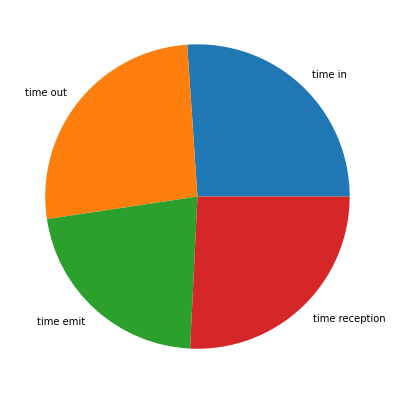

In [60]:
figure = plt.figure (figsize = (20, 7))
plt.pie (data, labels = datalabels)
plt.show ()

In [61]:
des = df2 ['DES.src'].tolist ()
des

[9,
 37,
 49,
 25,
 15,
 57,
 1,
 43,
 59,
 27,
 13,
 5,
 39,
 55,
 62,
 3,
 41,
 51,
 29,
 17,
 53,
 62,
 7,
 45,
 49,
 25,
 15,
 1,
 37,
 62,
 57,
 5,
 39,
 59,
 27,
 13,
 62,
 55,
 3,
 41,
 51,
 62,
 53,
 33,
 47,
 37,
 49,
 25,
 1,
 15,
 65,
 57,
 43,
 5,
 62,
 59,
 27,
 13,
 39,
 3,
 11,
 21,
 55,
 62,
 41,
 51,
 29,
 7,
 17,
 53,
 63,
 37,
 49,
 25,
 1,
 15,
 57,
 43,
 5,
 62,
 59,
 27,
 13,
 39,
 3,
 55,
 65,
 41,
 51,
 7,
 53,
 62,
 35,
 43,
 37,
 49,
 25,
 1,
 15,
 62,
 57,
 43,
 5,
 59,
 27,
 13,
 66,
 39,
 3,
 9,
 19,
 55,
 41,
 51,
 29,
 7,
 17,
 62,
 53,
 37,
 49,
 25,
 1,
 15,
 62,
 57,
 43,
 5,
 63,
 59,
 27,
 13,
 39,
 3,
 55,
 62,
 41,
 51,
 7,
 53,
 62,
 31,
 47,
 37,
 49,
 25,
 1,
 15,
 57,
 43,
 5,
 65,
 59,
 27,
 13,
 11,
 23,
 39,
 3,
 55,
 62,
 41,
 51,
 29,
 7,
 17,
 53,
 62,
 37,
 49,
 25,
 1,
 15,
 66,
 57,
 43,
 5,
 59,
 27,
 13,
 62,
 39,
 3,
 55,
 41,
 51,
 7,
 62,
 53,
 45,
 37,
 49,
 25,
 1,
 15,
 63,
 57,
 43,
 5,
 62,
 59,
 27,
 13,
 7,
 21,
 39,
 3,
 5

In [62]:
des_dst = df2 ['DES.dst'].tolist ()
des_dst

[62,
 65,
 66,
 64,
 63,
 66,
 62,
 65,
 66,
 64,
 63,
 62,
 65,
 66,
 0,
 62,
 65,
 66,
 64,
 63,
 66,
 0,
 62,
 65,
 66,
 64,
 63,
 62,
 65,
 0,
 66,
 62,
 65,
 66,
 64,
 63,
 0,
 66,
 62,
 65,
 66,
 0,
 66,
 60,
 60,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 65,
 62,
 60,
 60,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 65,
 62,
 66,
 0,
 65,
 66,
 62,
 66,
 0,
 60,
 60,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 66,
 64,
 63,
 0,
 65,
 62,
 60,
 60,
 66,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 65,
 62,
 66,
 0,
 65,
 66,
 62,
 66,
 0,
 60,
 60,
 65,
 66,
 64,
 62,
 63,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 60,
 60,
 65,
 62,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 66,
 64,
 63,
 0,
 65,
 62,
 66,
 65,
 66,
 62,
 0,
 66,
 60,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 60,
 60,
 6

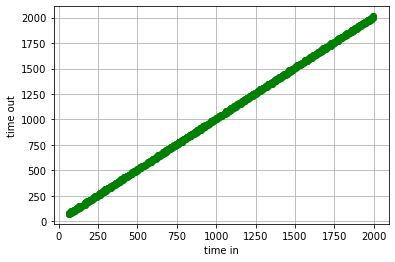

In [63]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

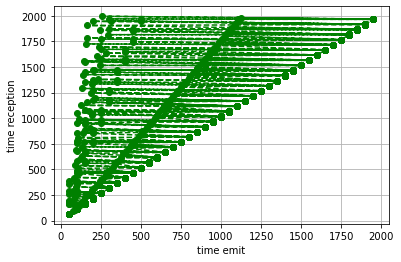

In [64]:
plt.plot (time_emit, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time emit')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

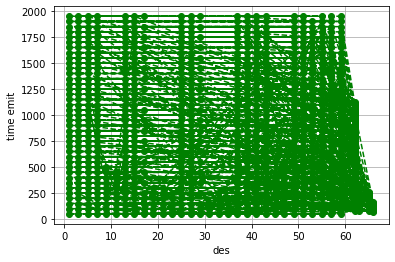

In [65]:
plt.plot (des, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

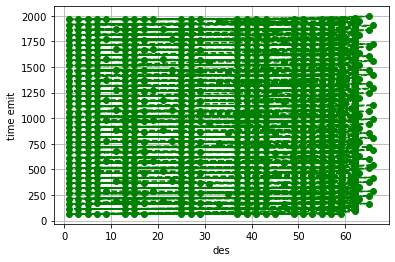

In [66]:
plt.plot (des, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

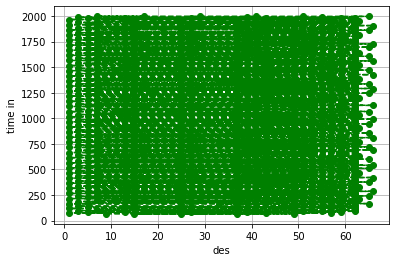

In [67]:
plt.plot (des, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

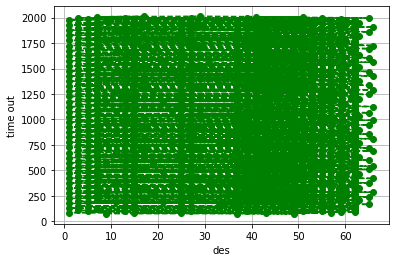

In [68]:
plt.plot (des, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

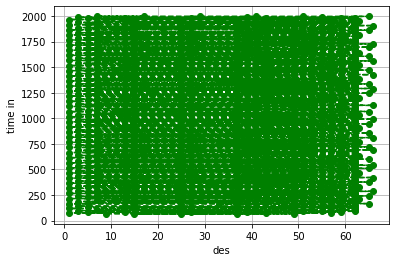

In [69]:
plt.plot (des, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

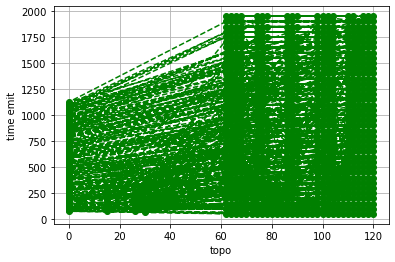

In [70]:
topo = df2 ['TOPO.src'].tolist ()
plt.plot (topo, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('topo')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

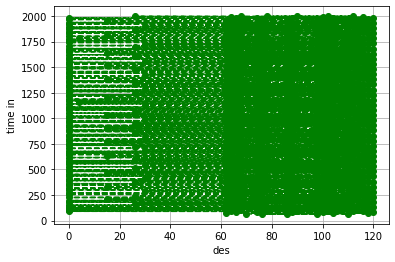

In [71]:
plt.plot (topo, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

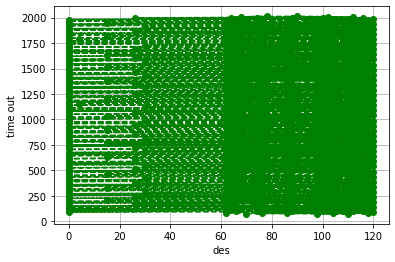

In [72]:
plt.plot (topo, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

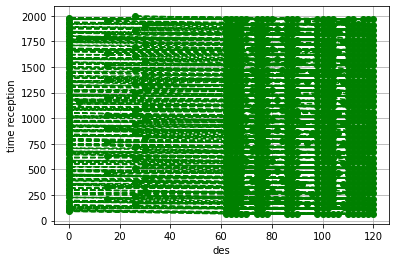

In [73]:
plt.plot (topo, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

In [74]:
data3 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_7.csv')
data3.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,10,COMP_M,app1,Mod1,M.sens,18,73,84,15,Sensor,16.000000,65.000034,81.000034,50.0,65.000034
1,22,COMP_M,app1,Mod1,M.sens,42,75,108,26,Sensor,10.666667,65.000035,75.666701,50.0,65.000035
2,1,COMP_M,app1,Mod1,M.sens,0,72,66,0,Sensor,10.666667,65.000043,75.666709,50.0,65.000043
3,15,COMP_M,app1,Mod1,M.sens,28,74,94,23,Sensor,16.000000,65.000045,81.000045,50.0,65.000045
4,29,COMP_M,app1,Mod1,M.sens,56,76,122,30,Sensor,8.000000,65.000053,73.000053,50.0,65.000053


In [75]:
df = DataFrame (data3)
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,10,COMP_M,app1,Mod1,M.sens,18,73,84,15,Sensor,16.000000,65.000034,81.000034,50.000000,65.000034
1,22,COMP_M,app1,Mod1,M.sens,42,75,108,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
2,1,COMP_M,app1,Mod1,M.sens,0,72,66,0,Sensor,10.666667,65.000043,75.666709,50.000000,65.000043
3,15,COMP_M,app1,Mod1,M.sens,28,74,94,23,Sensor,16.000000,65.000045,81.000045,50.000000,65.000045
4,29,COMP_M,app1,Mod1,M.sens,56,76,122,30,Sensor,8.000000,65.000053,73.000053,50.000000,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,669,SINK_M,app1,Actuator,M.result1,72,1,0,67,Mod1,0.000000,1995.666971,1995.666971,1057.666709,1995.666971
897,1353,COMP_M,app1,Mod1,M.sens,44,75,110,26,Sensor,10.666667,1997.000035,2007.666701,1950.000000,1965.000046
898,1334,COMP_M,app1,Mod1,M.sens,6,72,72,0,Sensor,10.666667,1997.000043,2007.666709,1950.000000,1968.000054
899,1346,COMP_M,app1,Mod1,M.sens,30,74,96,23,Sensor,16.000000,1997.000045,2013.000045,1950.000000,1965.000054


In [76]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              901 non-null    int64  
 1   type            901 non-null    object 
 2   app             901 non-null    object 
 3   module          901 non-null    object 
 4   message         901 non-null    object 
 5   DES.src         901 non-null    int64  
 6   DES.dst         901 non-null    int64  
 7   TOPO.src        901 non-null    int64  
 8   TOPO.dst        901 non-null    int64  
 9   module.src      901 non-null    object 
 10  service         901 non-null    float64
 11  time_in         901 non-null    float64
 12  time_out        901 non-null    float64
 13  time_emit       901 non-null    float64
 14  time_reception  901 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 105.7+ KB


In [77]:
df.describe ()

,id,DES.src,DES.dst,TOPO.src,TOPO.dst,service,time_in,time_out,time_emit,time_reception
count,901.000000,901.000000,901.000000,901.000000,901.00000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,561.974473,39.944506,63.406215,87.423973,24.72475,8.568356,1032.865460,1041.433816,834.607112,1022.302341
std,413.374111,24.481222,25.474548,38.341101,20.43406,5.491629,561.266331,561.199056,585.267089,561.451109
min,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,65.000034,73.000053,50.000000,65.000034
25%,176.000000,16.000000,72.000000,70.000000,4.00000,8.000000,547.000035,555.666775,300.000000,525.666771
50%,506.000000,44.000000,73.000000,96.000000,26.00000,10.666667,1034.000052,1047.000035,750.000000,1018.000040
75%,913.000000,60.000000,75.000000,118.000000,30.00000,10.666667,1518.000052,1531.000045,1350.000000,1515.000046
max,1364.000000,76.000000,76.000000,134.000000,67.00000,16.000000,1997.000053,2013.000045,1950.000000,1995.666971


In [78]:
time_in = df ['time_in'].tolist ()

In [79]:
time_in

[65.000034,
 65.00003457328991,
 65.00004281632653,
 65.00004482655247,
 65.00005263291139,
 73.00005263291139,
 75.66670123995658,
 75.6667094829932,
 81.000034,
 81.00004482655247,
 81.00005263291139,
 86.33336790662325,
 86.33337614965987,
 89.00005263291139,
 90.66671162380952,
 97.000034,
 97.00003457328992,
 97.00004281632654,
 97.00004482655248,
 97.0000526329114,
 105.0000526329114,
 105.66671366462585,
 107.6667012399566,
 107.6667094829932,
 115.00004482655244,
 115.0000526329114,
 118.00005187531173,
 118.33336790662328,
 118.33337614965988,
 120.66671570544216,
 123.0000526329114,
 129.00003457328992,
 129.00004281632656,
 131.00004482655245,
 131.00005263291138,
 134.00005187531173,
 135.6667177462585,
 139.00005263291138,
 139.66670123995658,
 139.6667094829932,
 150.66671978707484,
 164.00005214050196,
 165.0000345732899,
 165.00004281632653,
 165.00004482655245,
 165.00005263291138,
 165.66672182789117,
 167.00005674224224,
 167.00105674224224,
 168.00005187531173,
 173

In [80]:
time_out = df ['time_out'].tolist ()

In [81]:
time_emit = df ['time_emit'].tolist ()

In [82]:
time_reception = df ['time_reception'].tolist ()

In [83]:
time_out

[81.000034,
 75.66670123995658,
 75.6667094829932,
 81.00004482655247,
 73.00005263291139,
 81.00005263291139,
 86.33336790662325,
 86.33337614965987,
 97.000034,
 97.00004482655248,
 89.00005263291139,
 97.00003457328992,
 97.00004281632654,
 97.0000526329114,
 90.66671162380952,
 113.000034,
 107.6667012399566,
 107.6667094829932,
 113.00004482655248,
 105.0000526329114,
 113.0000526329114,
 105.66671366462585,
 118.33336790662328,
 118.33337614965988,
 131.00004482655245,
 123.0000526329114,
 134.00005187531173,
 129.00003457328992,
 129.00004281632656,
 120.66671570544216,
 131.00005263291138,
 139.66670123995658,
 139.6667094829932,
 147.00004482655245,
 139.00005263291138,
 150.00005187531173,
 135.6667177462585,
 147.00005263291138,
 150.33336790662324,
 150.33337614965987,
 150.66671978707484,
 164.00105214050197,
 175.66670123995655,
 175.66670948299318,
 181.00004482655245,
 173.00005263291138,
 165.66672182789117,
 167.00105674224224,
 167.00205674224225,
 184.00005187531173

In [84]:
time_emit

[50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 75.6667094829932,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 86.33337614965987,
 50.0,
 50.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 97.00004281632654,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 107.6667094829932,
 100.0,
 100.0,
 100.0,
 75.66670123995658,
 50.0,
 150.0,
 150.0,
 150.0,
 150.0,
 118.33337614965988,
 50.0,
 50.0,
 150.0,
 150.0,
 150.0,
 150.0,
 129.00004281632656,
 150.0,
 150.0,
 150.0,
 50.0,
 50.0,
 150.0,
 150.0,
 150.0,
 81.000034,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 139.6667094829932,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 150.33337614965987,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 86.33336790662325,
 200.0,
 200.0,
 175.66670948299318,
 50.0,
 250.0,
 250.0,
 250.0,
 250.0,
 100.0,
 50.0,
 250.0,
 73.00005263291139,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 50.0,
 50.0,
 250.0,
 186.33337614965984,
 250.0,
 250.0,
 25

In [85]:
time_reception

[65.000034,
 65.00003457328991,
 65.00004281632653,
 65.00004482655247,
 65.00005263291139,
 68.00003344654088,
 65.00003589830509,
 65.00005315089514,
 68.00005187531173,
 65.00005289058524,
 68.000033496063,
 65.00004031417625,
 68.00004256795133,
 68.00003494892917,
 90.66671162380952,
 68.00005421932116,
 65.0000415256917,
 68.00004755808656,
 65.00005381347151,
 68.0000367826087,
 68.00003959398497,
 105.66671366462585,
 65.00004644444445,
 68.00005367958656,
 115.00004482655244,
 115.0000526329114,
 118.00005187531173,
 115.0000345732899,
 115.00004281632653,
 120.66671570544216,
 118.00003494892916,
 115.00004031417625,
 115.00005315089514,
 115.0000538134715,
 118.00003678260867,
 118.00005421932114,
 135.6667177462585,
 118.00003959398497,
 115.00004644444444,
 118.00004256795133,
 150.66671978707484,
 164.00005214050196,
 165.0000345732899,
 165.00004281632653,
 165.00004482655245,
 165.00005263291138,
 165.66672182789117,
 167.00005674224224,
 167.0000622614687,
 168.0000518

In [86]:
mean_time_in = sum (time_in) // len (time_in)
print (mean_time_in)

1032.0


In [87]:
mean_time_out = sum (time_out) // len (time_out)

In [88]:
print ("mean of time out: ",  mean_time_out)

mean of time out:  1041.0


In [89]:
mean_time_emit = sum (time_emit) // len (time_emit)

In [90]:
print ("Mean of mean of time emit: ", mean_time_emit)

Mean of mean of time emit:  834.0


In [91]:
mean_time_reception = sum (time_reception) // len (time_reception)

In [92]:
print ("mean of time reception: ", mean_time_reception)

mean of time reception:  1022.0


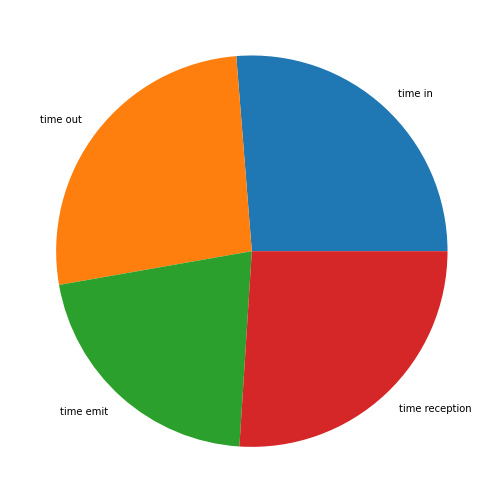

In [93]:
data = []
dataValue = []
data.append (mean_time_in)
data.append (mean_time_out)
data.append (mean_time_emit)
data.append (mean_time_reception)
dataValue.append ('time in')
dataValue.append ('time out')
dataValue.append ('time emit')
dataValue.append ('time reception')
figure = plt.figure(figsize = (20, 9))
plt.pie (data, labels = dataValue)
plt.show ()

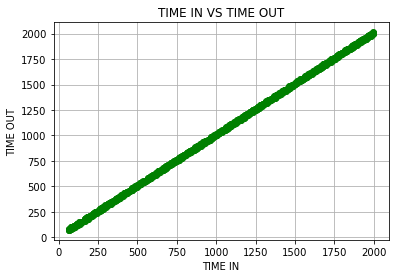

In [94]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME IN')
plt.ylabel ('TIME OUT')
plt.title ('TIME IN VS TIME OUT')
plt.grid (True)
plt.show ()

In [95]:
module_src = df ['module.src'].tolist ()
module_src

['Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Mod1',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 'Sensor',
 

In [96]:
#module
module = {
    'Sensor' : 0,
    'Mod1' : 0
}

c = 0
for i in module_src:
    module [i] += 1
module
test = []
test1 = []
test.append (module ['Sensor'])
test.append (module ['Mod1'])
test1.append ('Sensor')
test1.append ('Mod1')

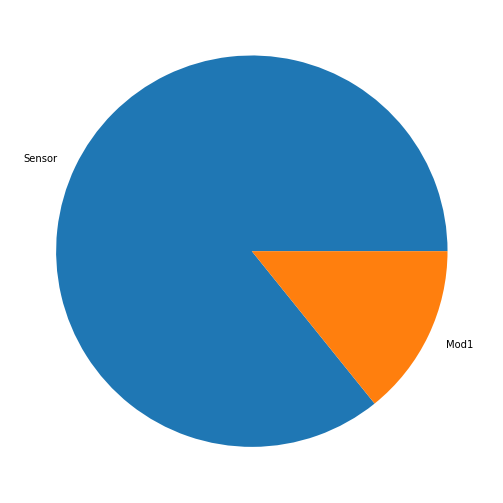

In [97]:
figure = plt.figure (figsize = (20, 9))
plt.pie (test, labels = test1)
plt.show ()

In [98]:
des_dst = df ['DES.dst'].tolist ()
des_dst

[73,
 75,
 72,
 74,
 76,
 76,
 75,
 72,
 73,
 74,
 76,
 75,
 72,
 76,
 1,
 73,
 75,
 72,
 74,
 76,
 76,
 1,
 75,
 72,
 74,
 76,
 73,
 75,
 72,
 1,
 76,
 75,
 72,
 74,
 76,
 73,
 1,
 76,
 75,
 72,
 1,
 70,
 75,
 72,
 74,
 76,
 1,
 70,
 70,
 73,
 76,
 75,
 72,
 1,
 74,
 76,
 73,
 70,
 70,
 75,
 72,
 76,
 1,
 75,
 72,
 74,
 76,
 76,
 1,
 75,
 72,
 74,
 76,
 73,
 76,
 75,
 72,
 1,
 74,
 76,
 73,
 75,
 72,
 76,
 1,
 75,
 72,
 1,
 70,
 75,
 72,
 74,
 76,
 70,
 70,
 73,
 1,
 76,
 75,
 72,
 74,
 76,
 70,
 70,
 73,
 1,
 75,
 72,
 76,
 75,
 72,
 74,
 76,
 1,
 76,
 75,
 72,
 74,
 76,
 1,
 73,
 76,
 75,
 72,
 1,
 74,
 76,
 73,
 75,
 72,
 76,
 1,
 75,
 72,
 1,
 70,
 75,
 72,
 74,
 76,
 70,
 70,
 73,
 76,
 75,
 72,
 1,
 74,
 76,
 70,
 70,
 73,
 75,
 72,
 76,
 1,
 75,
 72,
 74,
 76,
 76,
 1,
 75,
 72,
 74,
 76,
 73,
 1,
 76,
 75,
 72,
 74,
 76,
 73,
 1,
 75,
 72,
 76,
 75,
 72,
 1,
 70,
 70,
 70,
 75,
 72,
 74,
 76,
 1,
 73,
 76,
 75,
 72,
 1,
 74,
 76,
 70,
 70,
 73,
 75,
 72,
 76,
 1,
 75,
 72,
 74

In [99]:
des_src = df ['DES.src'].tolist ()
des_src

[18,
 42,
 0,
 28,
 56,
 66,
 48,
 2,
 16,
 32,
 64,
 46,
 4,
 60,
 72,
 14,
 50,
 8,
 30,
 58,
 62,
 72,
 44,
 6,
 28,
 56,
 16,
 42,
 0,
 72,
 60,
 46,
 2,
 30,
 58,
 14,
 72,
 62,
 44,
 4,
 75,
 40,
 42,
 0,
 28,
 56,
 72,
 68,
 52,
 16,
 66,
 48,
 2,
 72,
 32,
 64,
 14,
 24,
 10,
 46,
 4,
 60,
 73,
 44,
 6,
 30,
 58,
 62,
 72,
 42,
 0,
 28,
 56,
 16,
 60,
 48,
 2,
 72,
 30,
 58,
 14,
 46,
 4,
 62,
 75,
 44,
 6,
 72,
 38,
 42,
 0,
 28,
 56,
 66,
 54,
 16,
 76,
 66,
 48,
 2,
 32,
 64,
 22,
 12,
 14,
 72,
 46,
 4,
 60,
 44,
 6,
 30,
 58,
 73,
 62,
 42,
 0,
 28,
 56,
 72,
 16,
 60,
 48,
 2,
 72,
 30,
 58,
 14,
 46,
 4,
 62,
 75,
 44,
 6,
 72,
 34,
 42,
 0,
 28,
 56,
 64,
 48,
 16,
 66,
 48,
 2,
 73,
 32,
 64,
 26,
 10,
 14,
 46,
 4,
 60,
 72,
 44,
 6,
 30,
 58,
 62,
 72,
 42,
 0,
 28,
 56,
 16,
 76,
 60,
 48,
 2,
 30,
 58,
 14,
 72,
 46,
 4,
 62,
 44,
 6,
 72,
 36,
 68,
 50,
 42,
 0,
 28,
 56,
 75,
 16,
 66,
 48,
 2,
 72,
 32,
 64,
 20,
 12,
 14,
 46,
 4,
 60,
 73,
 44,
 6,
 30,
 58,
 

In [100]:
topo_src = df ['TOPO.src'].tolist ()
topo_src

[84,
 108,
 66,
 94,
 122,
 132,
 114,
 68,
 82,
 98,
 130,
 112,
 70,
 126,
 0,
 80,
 116,
 74,
 96,
 124,
 128,
 0,
 110,
 72,
 94,
 122,
 82,
 108,
 66,
 0,
 126,
 112,
 68,
 96,
 124,
 80,
 0,
 128,
 110,
 70,
 26,
 106,
 108,
 66,
 94,
 122,
 0,
 134,
 118,
 82,
 132,
 114,
 68,
 0,
 98,
 130,
 80,
 90,
 76,
 112,
 70,
 126,
 15,
 110,
 72,
 96,
 124,
 128,
 0,
 108,
 66,
 94,
 122,
 82,
 126,
 114,
 68,
 0,
 96,
 124,
 80,
 112,
 70,
 128,
 26,
 110,
 72,
 0,
 104,
 108,
 66,
 94,
 122,
 132,
 120,
 82,
 30,
 132,
 114,
 68,
 98,
 130,
 88,
 78,
 80,
 0,
 112,
 70,
 126,
 110,
 72,
 96,
 124,
 15,
 128,
 108,
 66,
 94,
 122,
 0,
 82,
 126,
 114,
 68,
 0,
 96,
 124,
 80,
 112,
 70,
 128,
 26,
 110,
 72,
 0,
 100,
 108,
 66,
 94,
 122,
 130,
 114,
 82,
 132,
 114,
 68,
 15,
 98,
 130,
 92,
 76,
 80,
 112,
 70,
 126,
 0,
 110,
 72,
 96,
 124,
 128,
 0,
 108,
 66,
 94,
 122,
 82,
 30,
 126,
 114,
 68,
 96,
 124,
 80,
 0,
 112,
 70,
 128,
 110,
 72,
 0,
 102,
 134,
 116,
 108,
 66,
 9

In [101]:
topo_dst = df ['TOPO.dst'].tolist ()
topo_dst

[15,
 26,
 0,
 23,
 30,
 30,
 26,
 0,
 15,
 23,
 30,
 26,
 0,
 30,
 67,
 15,
 26,
 0,
 23,
 30,
 30,
 67,
 26,
 0,
 23,
 30,
 15,
 26,
 0,
 67,
 30,
 26,
 0,
 23,
 30,
 15,
 67,
 30,
 26,
 0,
 67,
 4,
 26,
 0,
 23,
 30,
 67,
 4,
 4,
 15,
 30,
 26,
 0,
 67,
 23,
 30,
 15,
 4,
 4,
 26,
 0,
 30,
 67,
 26,
 0,
 23,
 30,
 30,
 67,
 26,
 0,
 23,
 30,
 15,
 30,
 26,
 0,
 67,
 23,
 30,
 15,
 26,
 0,
 30,
 67,
 26,
 0,
 67,
 4,
 26,
 0,
 23,
 30,
 4,
 4,
 15,
 67,
 30,
 26,
 0,
 23,
 30,
 4,
 4,
 15,
 67,
 26,
 0,
 30,
 26,
 0,
 23,
 30,
 67,
 30,
 26,
 0,
 23,
 30,
 67,
 15,
 30,
 26,
 0,
 67,
 23,
 30,
 15,
 26,
 0,
 30,
 67,
 26,
 0,
 67,
 4,
 26,
 0,
 23,
 30,
 4,
 4,
 15,
 30,
 26,
 0,
 67,
 23,
 30,
 4,
 4,
 15,
 26,
 0,
 30,
 67,
 26,
 0,
 23,
 30,
 30,
 67,
 26,
 0,
 23,
 30,
 15,
 67,
 30,
 26,
 0,
 23,
 30,
 15,
 67,
 26,
 0,
 30,
 26,
 0,
 67,
 4,
 4,
 4,
 26,
 0,
 23,
 30,
 67,
 15,
 30,
 26,
 0,
 67,
 23,
 30,
 4,
 4,
 15,
 26,
 0,
 30,
 67,
 26,
 0,
 23,
 30,
 30,
 67,
 26,
 0,
 2

In [102]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,10,COMP_M,app1,Mod1,M.sens,18,73,84,15,Sensor,16.000000,65.000034,81.000034,50.000000,65.000034
1,22,COMP_M,app1,Mod1,M.sens,42,75,108,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
2,1,COMP_M,app1,Mod1,M.sens,0,72,66,0,Sensor,10.666667,65.000043,75.666709,50.000000,65.000043
3,15,COMP_M,app1,Mod1,M.sens,28,74,94,23,Sensor,16.000000,65.000045,81.000045,50.000000,65.000045
4,29,COMP_M,app1,Mod1,M.sens,56,76,122,30,Sensor,8.000000,65.000053,73.000053,50.000000,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,669,SINK_M,app1,Actuator,M.result1,72,1,0,67,Mod1,0.000000,1995.666971,1995.666971,1057.666709,1995.666971
897,1353,COMP_M,app1,Mod1,M.sens,44,75,110,26,Sensor,10.666667,1997.000035,2007.666701,1950.000000,1965.000046
898,1334,COMP_M,app1,Mod1,M.sens,6,72,72,0,Sensor,10.666667,1997.000043,2007.666709,1950.000000,1968.000054
899,1346,COMP_M,app1,Mod1,M.sens,30,74,96,23,Sensor,16.000000,1997.000045,2013.000045,1950.000000,1965.000054


In [103]:
service = df ['service'].tolist ()

In [104]:
service

[16.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 16.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 8.0,
 0.0,
 16.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 8.0,
 0.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 16.0,
 10.666666666666666,
 10.666666666666666,
 0.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 16.0,
 0.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 0.0,
 0.001,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 0.0,
 0.001,
 0.001,
 16.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 0.0,
 16.0,
 8.0,
 16.0,
 0.001,
 0.001,
 10.666666666666666,
 10.666666666666666,
 8.0,
 0.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 8.0,
 0.0,
 10.666666666666666,
 10.666666666666666,
 16.0,
 8.0,
 16.0,
 8.0,
 10.666666666666666,
 10.666666666666666,
 0.0,
 16.0,
 8.0,
 16.0,
 10.666666666666666,
 10.666666666666666,
 8.0,
 0.0,
 10.6666666

In [105]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,10,COMP_M,app1,Mod1,M.sens,18,73,84,15,Sensor,16.000000,65.000034,81.000034,50.000000,65.000034
1,22,COMP_M,app1,Mod1,M.sens,42,75,108,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
2,1,COMP_M,app1,Mod1,M.sens,0,72,66,0,Sensor,10.666667,65.000043,75.666709,50.000000,65.000043
3,15,COMP_M,app1,Mod1,M.sens,28,74,94,23,Sensor,16.000000,65.000045,81.000045,50.000000,65.000045
4,29,COMP_M,app1,Mod1,M.sens,56,76,122,30,Sensor,8.000000,65.000053,73.000053,50.000000,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,669,SINK_M,app1,Actuator,M.result1,72,1,0,67,Mod1,0.000000,1995.666971,1995.666971,1057.666709,1995.666971
897,1353,COMP_M,app1,Mod1,M.sens,44,75,110,26,Sensor,10.666667,1997.000035,2007.666701,1950.000000,1965.000046
898,1334,COMP_M,app1,Mod1,M.sens,6,72,72,0,Sensor,10.666667,1997.000043,2007.666709,1950.000000,1968.000054
899,1346,COMP_M,app1,Mod1,M.sens,30,74,96,23,Sensor,16.000000,1997.000045,2013.000045,1950.000000,1965.000054


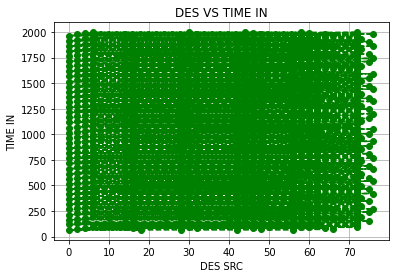

In [106]:
plt.plot (des_src, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('DES SRC')
plt.ylabel ('TIME IN')
plt.title ('DES VS TIME IN')
plt.grid (True)
plt.show ()

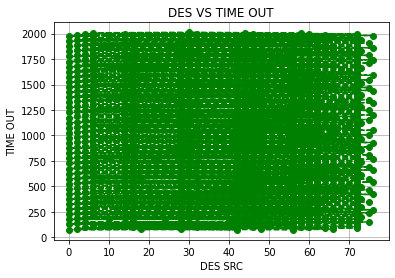

In [107]:
plt.plot (des_src, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('DES SRC')
plt.ylabel ('TIME OUT')
plt.title ('DES VS TIME OUT')
plt.grid (True)
plt.show ()

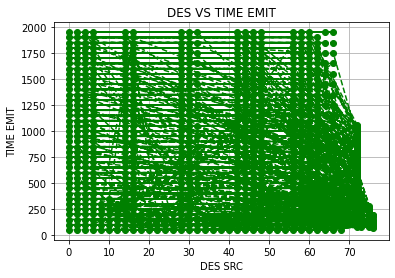

In [108]:
plt.plot (des_src, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('DES SRC')
plt.ylabel ('TIME EMIT')
plt.title ('DES VS TIME EMIT')
plt.grid (True)
plt.show ()

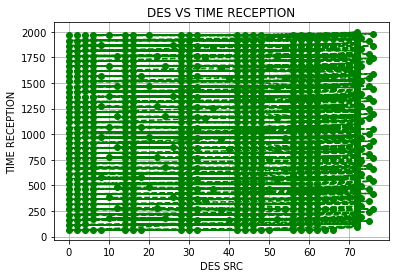

In [109]:
plt.plot (des_src, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('DES SRC')
plt.ylabel ('TIME RECEPTION')
plt.title ('DES VS TIME RECEPTION')
plt.grid (True)
plt.show ()

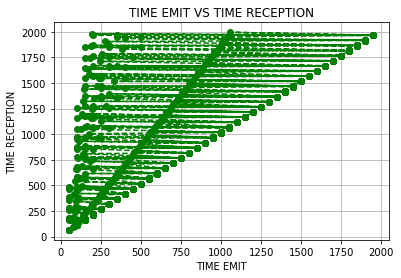

In [110]:
plt.plot (time_emit, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME EMIT')
plt.ylabel ('TIME RECEPTION')
plt.title ('TIME EMIT VS TIME RECEPTION')
plt.grid (True)
plt.show ()

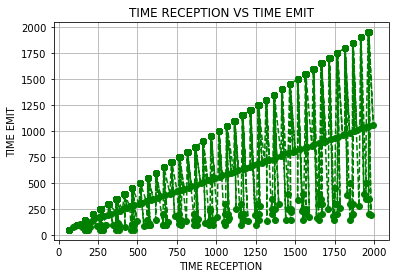

In [111]:
plt.plot (time_reception, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME RECEPTION')
plt.ylabel ('TIME EMIT')
plt.title ('TIME RECEPTION VS TIME EMIT')
plt.grid (True)
plt.show ()

In [112]:
data4 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_8.csv')
data4.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,5,COMP_M,app1,Mod1,M.sens,9,82,80,0,Sensor,10.666667,65.000033,75.666700,50.0,65.000033
1,36,COMP_M,app1,Mod1,M.sens,71,86,142,30,Sensor,8.000000,65.000038,73.000038,50.0,65.000038
2,27,COMP_M,app1,Mod1,M.sens,53,85,124,26,Sensor,10.666667,65.000041,75.666708,50.0,65.000041
3,17,COMP_M,app1,Mod1,M.sens,33,84,104,23,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
4,10,COMP_M,app1,Mod1,M.sens,19,83,90,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053


In [113]:
df = DataFrame (data4)

In [114]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,5,COMP_M,app1,Mod1,M.sens,9,82,80,0,Sensor,10.666667,65.000033,75.666700,50.0,65.000033
1,36,COMP_M,app1,Mod1,M.sens,71,86,142,30,Sensor,8.000000,65.000038,73.000038,50.0,65.000038
2,27,COMP_M,app1,Mod1,M.sens,53,85,124,26,Sensor,10.666667,65.000041,75.666708,50.0,65.000041
3,17,COMP_M,app1,Mod1,M.sens,33,84,104,23,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
4,10,COMP_M,app1,Mod1,M.sens,19,83,90,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1558,COMP_M,app1,Mod1,M.sens,75,86,146,30,Sensor,8.000000,1997.000038,2005.000038,1950.0,1968.000049
895,1548,COMP_M,app1,Mod1,M.sens,55,85,126,26,Sensor,10.666667,1997.000041,2007.666708,1950.0,1968.000060
896,1521,COMP_M,app1,Mod1,M.sens,1,82,72,0,Sensor,10.666667,1997.000048,2007.666715,1950.0,1968.000058
897,1538,COMP_M,app1,Mod1,M.sens,35,84,106,23,Sensor,16.000000,1997.000053,2013.000053,1950.0,1968.000037


In [115]:
time_in = df ['time_in'].tolist ()
time_out = df ['time_out'].tolist ()
time_emit = df ['time_emit'].tolist ()
time_reception = df ['time_reception'].tolist ()

In [116]:
mean_time_in = sum (time_in) // len (time_in)
mean_time_out = sum (time_out) // len (time_out)
mean_time_emit = sum (time_emit) // len (time_emit)
mean_time_reception = sum (time_reception) // len (time_reception)

In [117]:
data = []
dataValue = []
data.append (mean_time_in)
data.append (mean_time_out)
data.append (mean_time_emit)
data.append (mean_time_reception)
dataValue.append ('TIME IN')
dataValue.append ('TIME OUT')
dataValue.append ('TIME EMIT')
dataValue.append ('TIME RECEPTION')

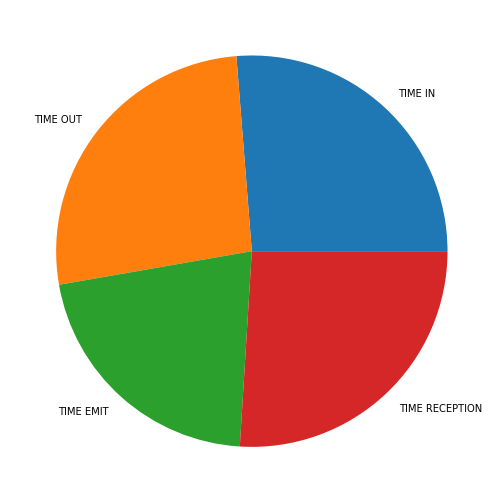

In [118]:
figure = plt.figure (figsize = (20, 9))
plt.pie (data, labels = dataValue)
plt.show ()

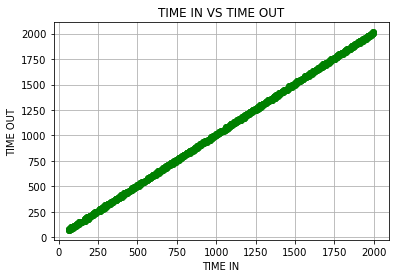

In [119]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME IN')
plt.ylabel ('TIME OUT')
plt.title ('TIME IN VS TIME OUT')
plt.grid (True)
plt.show ()

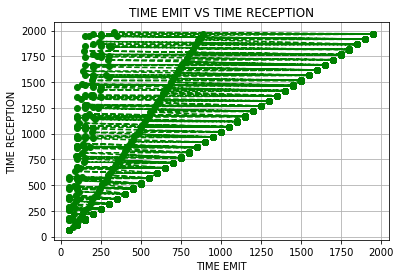

In [120]:
plt.plot (time_emit, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME EMIT')
plt.ylabel ('TIME RECEPTION')
plt.title ('TIME EMIT VS TIME RECEPTION')
plt.grid (True)
plt.show ()

In [121]:
des_src = df ['DES.src'].tolist ()
des_src

[9,
 71,
 53,
 33,
 19,
 69,
 7,
 49,
 67,
 37,
 17,
 3,
 51,
 73,
 82,
 5,
 75,
 57,
 35,
 21,
 65,
 1,
 55,
 82,
 71,
 33,
 19,
 3,
 53,
 69,
 5,
 49,
 82,
 67,
 35,
 17,
 65,
 1,
 51,
 82,
 59,
 45,
 71,
 53,
 7,
 33,
 19,
 85,
 77,
 69,
 49,
 3,
 67,
 37,
 17,
 82,
 27,
 15,
 51,
 5,
 73,
 75,
 55,
 1,
 35,
 21,
 82,
 65,
 71,
 53,
 7,
 33,
 19,
 83,
 69,
 49,
 3,
 67,
 35,
 17,
 51,
 5,
 82,
 65,
 55,
 1,
 82,
 61,
 47,
 71,
 53,
 7,
 33,
 19,
 79,
 69,
 85,
 49,
 3,
 67,
 37,
 17,
 31,
 11,
 51,
 5,
 73,
 82,
 75,
 55,
 1,
 35,
 21,
 65,
 86,
 71,
 53,
 7,
 33,
 19,
 69,
 49,
 3,
 82,
 67,
 35,
 17,
 51,
 5,
 65,
 83,
 55,
 1,
 63,
 41,
 82,
 71,
 53,
 7,
 33,
 19,
 73,
 69,
 49,
 3,
 67,
 37,
 17,
 82,
 25,
 13,
 51,
 5,
 73,
 75,
 55,
 1,
 35,
 21,
 85,
 65,
 71,
 53,
 7,
 33,
 19,
 82,
 69,
 49,
 3,
 67,
 35,
 17,
 83,
 51,
 5,
 65,
 55,
 1,
 82,
 59,
 39,
 77,
 71,
 53,
 7,
 33,
 19,
 82,
 69,
 49,
 3,
 67,
 37,
 17,
 29,
 9,
 51,
 5,
 73,
 86,
 75,
 55,
 1,
 35,
 21,
 65,
 8

In [122]:
des_dst = df ['DES.dst'].tolist ()
des_dst

[82,
 86,
 85,
 84,
 83,
 86,
 82,
 85,
 86,
 84,
 83,
 82,
 85,
 86,
 0,
 82,
 86,
 85,
 84,
 83,
 86,
 82,
 85,
 0,
 86,
 84,
 83,
 82,
 85,
 86,
 82,
 85,
 0,
 86,
 84,
 83,
 86,
 82,
 85,
 0,
 80,
 80,
 86,
 85,
 82,
 84,
 83,
 0,
 80,
 86,
 85,
 82,
 86,
 84,
 83,
 0,
 80,
 80,
 85,
 82,
 86,
 86,
 85,
 82,
 84,
 83,
 0,
 86,
 86,
 85,
 82,
 84,
 83,
 0,
 86,
 85,
 82,
 86,
 84,
 83,
 85,
 82,
 0,
 86,
 85,
 82,
 0,
 80,
 80,
 86,
 85,
 82,
 84,
 83,
 80,
 86,
 0,
 85,
 82,
 86,
 84,
 83,
 80,
 80,
 85,
 82,
 86,
 0,
 86,
 85,
 82,
 84,
 83,
 86,
 0,
 86,
 85,
 82,
 84,
 83,
 86,
 85,
 82,
 0,
 86,
 84,
 83,
 85,
 82,
 86,
 0,
 85,
 82,
 80,
 80,
 0,
 86,
 85,
 82,
 84,
 83,
 80,
 86,
 85,
 82,
 86,
 84,
 83,
 0,
 80,
 80,
 85,
 82,
 86,
 86,
 85,
 82,
 84,
 83,
 0,
 86,
 86,
 85,
 82,
 84,
 83,
 0,
 86,
 85,
 82,
 86,
 84,
 83,
 0,
 85,
 82,
 86,
 85,
 82,
 0,
 80,
 80,
 80,
 86,
 85,
 82,
 84,
 83,
 0,
 86,
 85,
 82,
 86,
 84,
 83,
 80,
 80,
 85,
 82,
 86,
 0,
 86,
 85,
 82,
 84

In [123]:
topo_src = df ['TOPO.src'].tolist ()

In [125]:
topo_src

[80,
 142,
 124,
 104,
 90,
 140,
 78,
 120,
 138,
 108,
 88,
 74,
 122,
 144,
 0,
 76,
 146,
 128,
 106,
 92,
 136,
 72,
 126,
 0,
 142,
 104,
 90,
 74,
 124,
 140,
 76,
 120,
 0,
 138,
 106,
 88,
 136,
 72,
 122,
 0,
 130,
 116,
 142,
 124,
 78,
 104,
 90,
 26,
 148,
 140,
 120,
 74,
 138,
 108,
 88,
 0,
 98,
 86,
 122,
 76,
 144,
 146,
 126,
 72,
 106,
 92,
 0,
 136,
 142,
 124,
 78,
 104,
 90,
 15,
 140,
 120,
 74,
 138,
 106,
 88,
 122,
 76,
 0,
 136,
 126,
 72,
 0,
 132,
 118,
 142,
 124,
 78,
 104,
 90,
 150,
 140,
 26,
 120,
 74,
 138,
 108,
 88,
 102,
 82,
 122,
 76,
 144,
 0,
 146,
 126,
 72,
 106,
 92,
 136,
 30,
 142,
 124,
 78,
 104,
 90,
 140,
 120,
 74,
 0,
 138,
 106,
 88,
 122,
 76,
 136,
 15,
 126,
 72,
 134,
 112,
 0,
 142,
 124,
 78,
 104,
 90,
 144,
 140,
 120,
 74,
 138,
 108,
 88,
 0,
 96,
 84,
 122,
 76,
 144,
 146,
 126,
 72,
 106,
 92,
 26,
 136,
 142,
 124,
 78,
 104,
 90,
 0,
 140,
 120,
 74,
 138,
 106,
 88,
 15,
 122,
 76,
 136,
 126,
 72,
 0,
 130,
 110,


In [126]:
data5 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_9.csv')
data5.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,30,COMP_M,app1,Mod1,M.sens,58,95,134,26,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
1,41,COMP_M,app1,Mod1,M.sens,80,96,156,30,Sensor,8.000000,65.000041,73.000041,50.0,65.000041
2,19,COMP_M,app1,Mod1,M.sens,36,94,112,23,Sensor,16.000000,65.000045,81.000045,50.0,65.000045
3,1,COMP_M,app1,Mod1,M.sens,0,92,76,0,Sensor,10.666667,65.000050,75.666717,50.0,65.000050
4,10,COMP_M,app1,Mod1,M.sens,18,93,94,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053


In [127]:
df = DataFrame (data5)

In [128]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,30,COMP_M,app1,Mod1,M.sens,58,95,134,26,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
1,41,COMP_M,app1,Mod1,M.sens,80,96,156,30,Sensor,8.000000,65.000041,73.000041,50.0,65.000041
2,19,COMP_M,app1,Mod1,M.sens,36,94,112,23,Sensor,16.000000,65.000045,81.000045,50.0,65.000045
3,1,COMP_M,app1,Mod1,M.sens,0,92,76,0,Sensor,10.666667,65.000050,75.666717,50.0,65.000050
4,10,COMP_M,app1,Mod1,M.sens,18,93,94,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,1741,COMP_M,app1,Mod1,M.sens,60,95,136,26,Sensor,10.666667,1997.000034,2007.666701,1950.0,1968.000033
917,1747,COMP_M,app1,Mod1,M.sens,72,96,148,30,Sensor,8.000000,1997.000041,2005.000041,1950.0,1968.000033
918,1731,COMP_M,app1,Mod1,M.sens,40,94,116,23,Sensor,16.000000,1997.000045,2013.000045,1950.0,1968.000033
919,1714,COMP_M,app1,Mod1,M.sens,6,92,82,0,Sensor,10.666667,1997.000050,2007.666717,1950.0,1968.000047


In [129]:
time_in = df ['time_in'].tolist ()

In [130]:
time_in

[65.00003384713376,
 65.00004091050585,
 65.00004501075269,
 65.00004984688995,
 65.00005263291139,
 73.00004091050585,
 75.66670051380044,
 75.66671651355662,
 81.00004091050585,
 81.00004501075269,
 81.00005263291139,
 86.3333671804671,
 86.3333831802233,
 89.00004091050585,
 90.66671900590111,
 97.00003384713378,
 97.00004091050585,
 97.00004501075269,
 97.00004984688997,
 97.0000526329114,
 105.00004091050585,
 105.6667213982456,
 107.66670051380044,
 107.66671651355664,
 115.0000417614314,
 115.00004501075269,
 115.0000526329114,
 118.33336718046712,
 118.33338318022332,
 120.66672379059013,
 123.0000417614314,
 129.00003384713378,
 129.00004984688997,
 131.00004176143142,
 131.00004501075267,
 131.00005263291138,
 135.6667261829346,
 139.00004176143142,
 139.66670051380044,
 139.66671651355662,
 150.6667285752791,
 164.00005427808452,
 164.00105427808452,
 164.00205427808453,
 165.00003384713375,
 165.00004091050585,
 165.00004501075267,
 165.00004984688994,
 165.00005263291138,


In [134]:
time_in_real_values = []
time_in_real_values.append (0)
for i in time_in:
    if i not in time_in_real_values:
        time_in_real_values.append (i)

[0,
 65.00003384713376,
 65.00004091050585,
 65.00004501075269,
 65.00004984688995,
 65.00005263291139,
 73.00004091050585,
 75.66670051380044,
 75.66671651355662,
 81.00004091050585,
 81.00004501075269,
 81.00005263291139,
 86.3333671804671,
 86.3333831802233,
 89.00004091050585,
 90.66671900590111,
 97.00003384713378,
 97.00004091050585,
 97.00004501075269,
 97.00004984688997,
 97.0000526329114,
 105.00004091050585,
 105.6667213982456,
 107.66670051380044,
 107.66671651355664,
 115.0000417614314,
 115.00004501075269,
 115.0000526329114,
 118.33336718046712,
 118.33338318022332,
 120.66672379059013,
 123.0000417614314,
 129.00003384713378,
 129.00004984688997,
 131.00004176143142,
 131.00004501075267,
 131.00005263291138,
 135.6667261829346,
 139.00004176143142,
 139.66670051380044,
 139.66671651355662,
 150.6667285752791,
 164.00005427808452,
 164.00105427808452,
 164.00205427808453,
 165.00003384713375,
 165.00004091050585,
 165.00004501075267,
 165.00004984688994,
 165.000052632911

In [138]:
time_out_real_values

for i in time_out:
    if i not in time_out_real_values:
        time_out_real_values.append (i)
time_out_real_values

[75.66670051380044,
 73.00004091050585,
 81.00004501075269,
 75.66671651355662,
 81.00005263291139,
 81.00004091050585,
 86.3333671804671,
 86.3333831802233,
 89.00004091050585,
 97.00004501075269,
 97.0000526329114,
 97.00003384713378,
 97.00004984688997,
 97.00004091050585,
 90.66671900590111,
 107.66670051380044,
 105.00004091050585,
 113.00004501075269,
 107.66671651355664,
 113.0000526329114,
 113.00004091050585,
 105.6667213982456,
 118.33336718046712,
 118.33338318022332,
 123.0000417614314,
 131.00004501075267,
 131.00005263291138,
 129.00003384713378,
 129.00004984688997,
 120.66672379059013,
 131.00004176143142,
 139.66670051380044,
 139.66671651355662,
 139.00004176143142,
 147.00004501075267,
 147.00005263291138,
 135.6667261829346,
 147.00004176143142,
 150.3333671804671,
 150.33338318022328,
 150.6667285752791,
 164.00105427808452,
 164.00205427808453,
 164.00305427808453,
 175.6667005138004,
 173.00004091050585,
 181.00004501075267,
 175.6667165135566,
 181.0000526329113

In [141]:
print (len (time_in))
print (len (time_out))

921
899


In [142]:
time_emit = df ['time_emit'].tolist ()

In [143]:
print (len (time_emit))

921


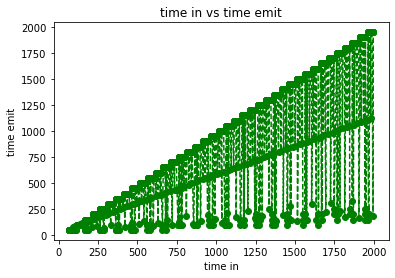

In [144]:
plt.plot (time_in, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ("time in")
plt.ylabel ('time emit')
plt.title ('time in vs time emit')
plt.show ()

In [145]:
mean_time_in = sum (time_in) // len (time_in)

In [146]:
print (mean_time_in)

1033.0


In [147]:
mean_time_out = sum (time_out) // len (time_out)
print ('mean time out: ', mean_time_out)

mean time out:  1042.0


In [148]:
mean_time_emit = sum (time_emit) // len (time_emit)
print (mean_time_emit)

836.0


In [149]:
mean_time_reception = sum (time_reception) // len (time_reception)
print (mean_time_reception)

1022.0


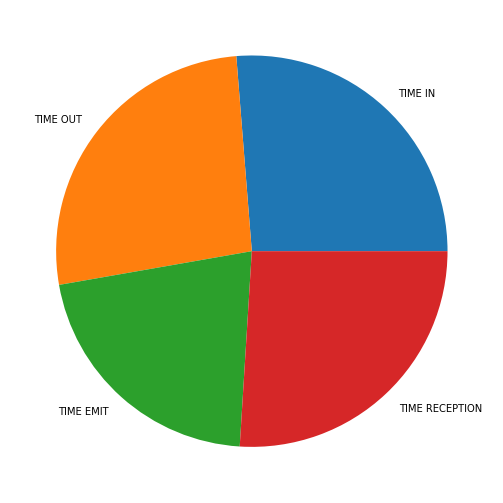

In [150]:
data = []
dataValues = []
data.append (mean_time_in)
data.append (mean_time_out)
data.append (mean_time_emit)
data.append (mean_time_reception)

dataValues.append ('TIME IN')
dataValues.append ('TIME OUT')
dataValues.append ('TIME EMIT')
dataValues.append ('TIME RECEPTION')

figure = plt.figure (figsize = (20, 9))
plt.pie (data, labels = dataValues)
plt.show ()

In [151]:
print (len(time_in))

921


In [152]:
print (len (time_out))

899


In [153]:
time_in_values = []
for i in range (0, len (time_out)):
    time_in_values.append (time_in [i])
print (len (time_in_values))
time_in = time_in_values

899


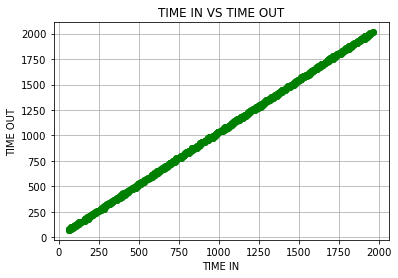

In [155]:
plt.plot (time_in_values, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME IN')
plt.ylabel ('TIME OUT')
plt.title ('TIME IN VS TIME OUT')
plt.grid (True)
plt.show ()

In [156]:
data6 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_11.csv')
data6.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,34,COMP_M,app1,Mod1,M.sens,66,115,152,26,Sensor,10.666667,65.000032,75.666699,50.0,65.000032
1,24,COMP_M,app1,Mod1,M.sens,46,114,132,23,Sensor,16.000000,65.000032,81.000032,50.0,65.000032
2,12,COMP_M,app1,Mod1,M.sens,22,113,108,15,Sensor,16.000000,65.000034,81.000034,50.0,65.000034
3,50,COMP_M,app1,Mod1,M.sens,98,116,184,30,Sensor,8.000000,65.000034,73.000034,50.0,65.000034
4,2,COMP_M,app1,Mod1,M.sens,2,112,88,0,Sensor,10.666667,65.000036,75.666703,50.0,65.000036


In [157]:
df = DataFrame (data6)

In [158]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,34,COMP_M,app1,Mod1,M.sens,66,115,152,26,Sensor,10.666667,65.000032,75.666699,50.0,65.000032
1,24,COMP_M,app1,Mod1,M.sens,46,114,132,23,Sensor,16.000000,65.000032,81.000032,50.0,65.000032
2,12,COMP_M,app1,Mod1,M.sens,22,113,108,15,Sensor,16.000000,65.000034,81.000034,50.0,65.000034
3,50,COMP_M,app1,Mod1,M.sens,98,116,184,30,Sensor,8.000000,65.000034,73.000034,50.0,65.000034
4,2,COMP_M,app1,Mod1,M.sens,2,112,88,0,Sensor,10.666667,65.000036,75.666703,50.0,65.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,2126,COMP_M,app1,Mod1,M.sens,70,115,156,26,Sensor,10.666667,1997.000032,2007.666699,1950.0,1968.000055
897,2115,COMP_M,app1,Mod1,M.sens,48,114,134,23,Sensor,16.000000,1997.000032,2013.000032,1950.0,1968.000033
898,2103,COMP_M,app1,Mod1,M.sens,24,113,110,15,Sensor,16.000000,1997.000034,2013.000034,1950.0,1968.000033
899,2137,COMP_M,app1,Mod1,M.sens,92,116,178,30,Sensor,8.000000,1997.000034,2005.000034,1950.0,1968.000034


In [159]:
time_in = df ['time_in'].tolist ()

In [160]:
time_in

[65.00003203003003,
 65.00003212048193,
 65.00003384713376,
 65.00003415434084,
 65.00003636426118,
 73.00003415434084,
 75.6666986966967,
 75.66670303092785,
 81.00003212048193,
 81.00003384713376,
 81.00003415434084,
 86.33336536336337,
 86.33336969759452,
 89.00003415434084,
 93.6667047702721,
 97.00003203003004,
 97.00003212048192,
 97.00003384713376,
 97.00003415434084,
 97.0000363642612,
 105.00003415434084,
 107.66669869669671,
 107.66670303092786,
 111.66670640961637,
 115.00003212048192,
 115.00003384713376,
 115.00003856307129,
 118.33336536336338,
 118.33336969759452,
 123.00003856307129,
 129.00003203003004,
 129.0000363642612,
 129.66670804896063,
 131.00003212048193,
 131.00003384713375,
 131.00003856307129,
 139.00003856307129,
 139.6666986966967,
 139.66670303092786,
 147.6667096883049,
 164.00005255437117,
 164.00105255437117,
 164.00205255437118,
 165.00003203003,
 165.00003212048193,
 165.00003384713375,
 165.00003415434082,
 165.00003636426118,
 165.66671132764915,


In [161]:
time_out = df ['time_out'].tolist ()

In [162]:
print ('time in: ', len (time_in), ' time out: ', len (time_out))

time in:  901  time out:  901


In [164]:
time_in_filter = []
for i in time_in:
    if i not in time_in_filter:
        time_in_filter.append (i)
time_out_filter = []

for i in time_out:
    if i not in time_out_filter:
        time_out_filter.append (i)

print (len (time_in_filter), len (time_out_filter))

901 901


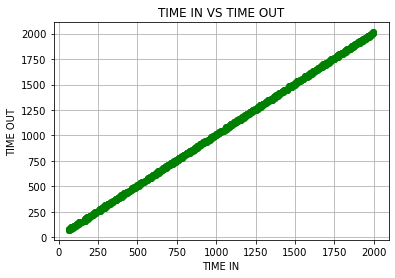

In [165]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('TIME IN')
plt.ylabel ('TIME OUT')
plt.title ('TIME IN VS TIME OUT')
plt.grid (True)
plt.show ()

In [166]:
mean_time_in = sum (time_in) // len (time_in)
mean_time_out = sum (time_out) // len (time_out)
time_emit = df ['time_emit'].tolist ()

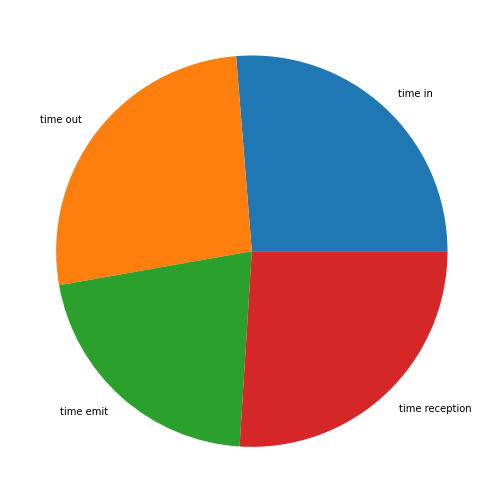

In [167]:
mean_time_emit = sum (time_emit) // len (time_emit)
time_reception = df ['time_reception'].tolist ()
mean_time_reception = sum (time_reception) // len (time_reception)

data = []
dataValue = []

data.append (mean_time_in)
data.append (mean_time_out)
data.append (mean_time_emit)
data.append (mean_time_reception)

dataValue.append ('time in')
dataValue.append ('time out')
dataValue.append ('time emit')
dataValue.append ('time reception')

figure = plt.figure(figsize = (20, 9))
plt.pie (data, labels = dataValue)
plt.show ()

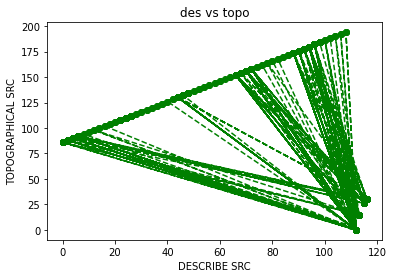

In [168]:
des_src = df ['DES.src'].tolist ()
topo_src = df ['TOPO.src'].tolist ()

plt.plot (des_src, topo_src, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ("DESCRIBE SRC")
plt.ylabel ('TOPOGRAPHICAL SRC')
plt.title ('des vs topo')
plt.show ()

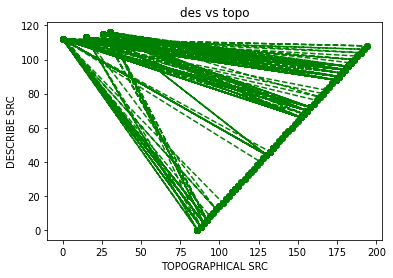

In [169]:
plt.plot (topo_src, des_src, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ("TOPOGRAPHICAL SRC")
plt.ylabel ('DESCRIBE SRC')
plt.title ('des vs topo')
plt.show ()

# latency rate

In [170]:
data7 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_latency-aware_2000_5_5.csv')
data7.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.0,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.0,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.0,65.000035
3,15,COMP_M,app1,Mod1,M.sens,28,54,84,23,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
4,9,COMP_M,app1,Mod1,M.sens,16,53,72,15,Sensor,16.000000,65.000058,81.000058,50.0,65.000058


In [171]:
df = DataFrame (data7)

In [172]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.000000,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.000000,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
3,15,COMP_M,app1,Mod1,M.sens,28,54,84,23,Sensor,16.000000,65.000053,81.000053,50.000000,65.000053
4,9,COMP_M,app1,Mod1,M.sens,16,53,72,15,Sensor,16.000000,65.000058,81.000058,50.000000,65.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,973,COMP_M,app1,Mod1,M.sens,44,56,100,30,Sensor,8.000000,1989.000032,1997.000032,1950.000000,1968.000037
925,902,COMP_M,app1,Mod1,M.sens,2,52,58,0,Sensor,10.666667,1995.666699,2006.333365,1850.000000,1865.000032
926,916,COMP_M,app1,Mod1,M.sens,30,55,86,26,Sensor,10.666667,1995.666701,2006.333368,1850.000000,1865.000037
927,429,SINK_M,app1,Actuator,M.result1,52,1,0,57,Mod1,0.000000,1995.666891,1995.666891,1025.000032,1995.666891


In [173]:
des_src = df ['DES.src'].tolist ()
des_dst = df ['DES.dst'].tolist ()
topo_src = df ['TOPO.src'].tolist ()
topo_dst = df ['TOPO.dst'].tolist ()

In [174]:
time_in = df ['time_in'].tolist ()
time_out = df ['time_out'].tolist ()
time_emit = df ['time_emit'].tolist ()
time_reception = df ['time_reception'].tolist ()

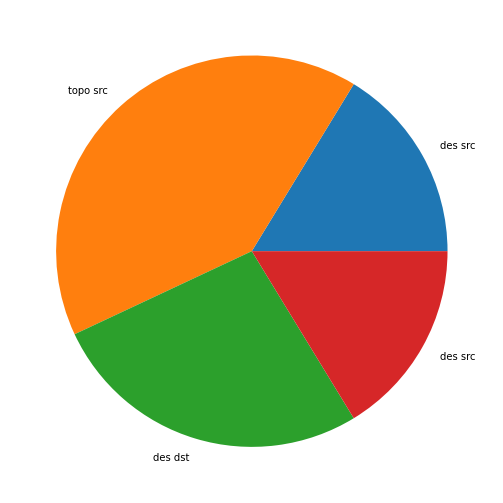

In [176]:
des = []
mean_des_src = sum (des_src) // len (des_src)
mean_des_dst = sum (des_dst) // len (des_dst)
mean_topo_src = sum (topo_src) // len (topo_src)
mean_topo_dst = sum (topo_dst) // len (topo_dst)

des.append (mean_des_src)
des.append (mean_topo_src)
des.append (mean_des_dst)
des.append (mean_des_src)
des_value = []
des_value.append ('des src')
des_value.append ('topo src')
des_value.append ('des dst')
des_value.append ('des src')
figure = plt.figure (figsize = (20, 9))
plt.pie (des, labels = des_value)
plt.show ()

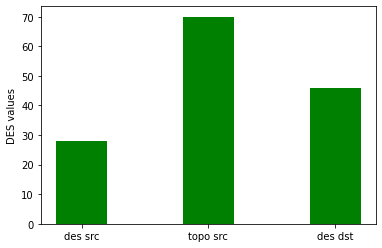

In [190]:
plt.bar (des_value, des, color = 'green', width=0.4)
plt.ylabel ('DES values')
plt.show ()

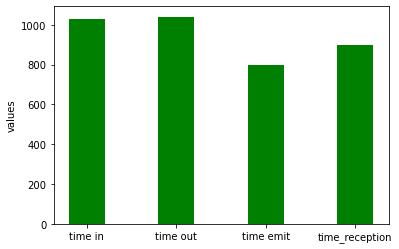

In [191]:
time_in = df ['time_in'].tolist ()
time_out = df ['time_out'].tolist ()
time_emit = df ['time_emit'].tolist ()
time_reception = df ['time_reception'].tolist ()

mean_time_in = sum (time_in) // len (time_in)
mean_time_out = sum (time_out) // len (time_out)
mean_time_emit = sum (time_emit) // len (time_emit)
mean_time_reception = sum (time_reception) // len (time_reception)

value = []
value_data = []

value.append (mean_time_in)
value.append (mean_time_out)
value.append (mean_time_emit)
value.append (mean_time_reception)
value_data.append ('time in')
value_data.append ('time out')
value_data.append ('time emit')
value_data.append ('time_reception')

plt.bar (value_data, value, color = 'green', width = 0.4)
plt.ylabel ('values')
plt.show ()

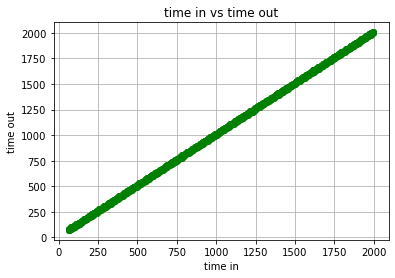

In [193]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('time out')
plt.title ('time in vs time out')
plt.grid (True)
plt.show ()

In [194]:
data8 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_latency-aware_2000_5_6.csv')
data8.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,17,COMP_M,app1,Mod1,M.sens,33,64,94,23,Sensor,16.000000,65.000034,81.000034,50.0,65.000034
1,5,COMP_M,app1,Mod1,M.sens,9,62,70,0,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
2,11,COMP_M,app1,Mod1,M.sens,21,63,82,15,Sensor,16.000000,65.000035,81.000035,50.0,65.000035
3,19,COMP_M,app1,Mod1,M.sens,37,65,98,26,Sensor,10.666667,65.000035,75.666702,50.0,65.000035
4,25,COMP_M,app1,Mod1,M.sens,49,66,110,30,Sensor,8.000000,65.000036,73.000036,50.0,65.000036


In [195]:
df = DataFrame (data8)

In [196]:
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,17,COMP_M,app1,Mod1,M.sens,33,64,94,23,Sensor,16.000000,65.000034,81.000034,50.000000,65.000034
1,5,COMP_M,app1,Mod1,M.sens,9,62,70,0,Sensor,10.666667,65.000034,75.666701,50.000000,65.000034
2,11,COMP_M,app1,Mod1,M.sens,21,63,82,15,Sensor,16.000000,65.000035,81.000035,50.000000,65.000035
3,19,COMP_M,app1,Mod1,M.sens,37,65,98,26,Sensor,10.666667,65.000035,75.666702,50.000000,65.000035
4,25,COMP_M,app1,Mod1,M.sens,49,66,110,30,Sensor,8.000000,65.000036,73.000036,50.000000,65.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,1168,COMP_M,app1,Mod1,M.sens,55,66,116,30,Sensor,8.000000,1989.000036,1997.000036,1950.000000,1968.000039
963,901,COMP_M,app1,Mod1,M.sens,1,62,62,0,Sensor,10.666667,1995.666701,2006.333368,1550.000000,1565.000040
964,922,COMP_M,app1,Mod1,M.sens,43,65,104,26,Sensor,10.666667,1995.666702,2006.333369,1550.000000,1565.000041
965,424,SINK_M,app1,Actuator,M.result1,62,0,0,61,Mod1,0.000000,1995.666941,1995.666941,1025.000034,1995.666941


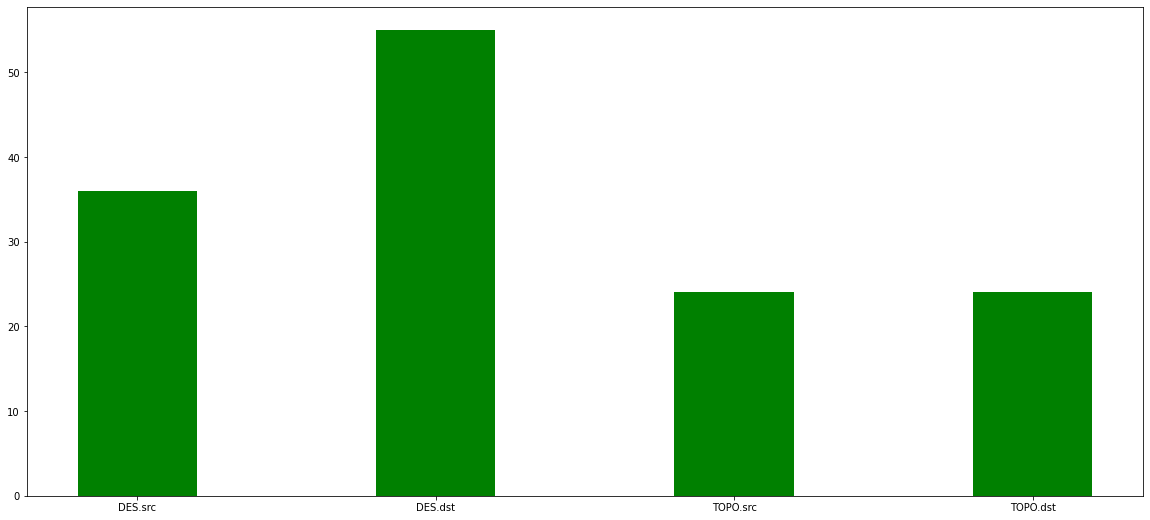

In [198]:
des = []
des_src = df ['DES.src'].tolist ()
mean_des_src = sum (des_src) // len (des_src)
des.append (mean_des_src)

des_dst = df ['DES.dst'].tolist ()
mean_des_dst = sum (des_dst) // len (des_dst)
des.append (mean_des_dst)

topo_src = df ['TOPO.src'].tolist ()
mean_topo_src = sum (topo_dst) // len (topo_dst)
des.append (mean_topo_src)

topo_dst = df ['TOPO.dst'].tolist ()
mean_topo_src = sum (topo_dst) // len (topo_dst)
des.append (mean_topo_dst)

des_value = []
des_value.append ('DES.src')
des_value.append ('DES.dst')
des_value.append ('TOPO.src')
des_value.append ('TOPO.dst')

figure = plt.figure (figsize = (20, 9))
plt.bar (des_value, des, color = 'green', width = 0.4)
plt.show ()

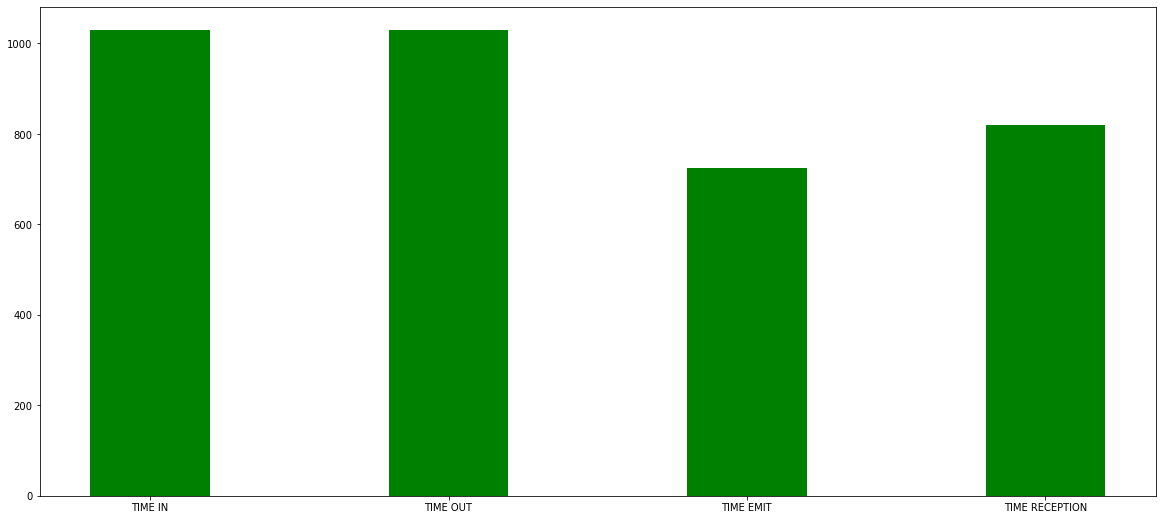

In [199]:
time_in = df ['time_in'].tolist ()
mean_time_in = sum (time_in) // len (time_in)
time_out = df ['time_out'].tolist ()
mean_time_out = sum (time_in) // len (time_out)
time_emit = df ['time_emit'].tolist ()
mean_time_emit = sum (time_emit) // len (time_emit)
time_reception = df ['time_reception'].tolist ()
mean_time_reception = sum (time_reception) // len (time_reception)

data = []
dataValue = []

data.append (mean_time_in)
data.append (mean_time_out)
data.append (mean_time_emit)
data.append (mean_time_reception)

dataValue.append ('TIME IN')
dataValue.append ('TIME OUT')
dataValue.append ('TIME EMIT')
dataValue.append ('TIME RECEPTION')


figure = plt.figure (figsize = (20, 9))
plt.bar (dataValue, data, color = 'green', width = 0.4)
plt.show ()

# RESOURCE AWARE

In [200]:
resource_aware = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_resource-aware_2000_5_5.csv')
resource_aware.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.0,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.0,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.0,65.000035
3,15,COMP_M,app1,Mod1,M.sens,28,54,84,23,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
4,9,COMP_M,app1,Mod1,M.sens,16,53,72,15,Sensor,16.000000,65.000058,81.000058,50.0,65.000058


In [201]:
df = DataFrame (resource_aware)
df

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.000000,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.000000,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
3,15,COMP_M,app1,Mod1,M.sens,28,54,84,23,Sensor,16.000000,65.000053,81.000053,50.000000,65.000053
4,9,COMP_M,app1,Mod1,M.sens,16,53,72,15,Sensor,16.000000,65.000058,81.000058,50.000000,65.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,955,COMP_M,app1,Mod1,M.sens,8,60,64,5,Sensor,1.600000,1990.600078,1992.200078,1950.000000,1989.000128
1041,905,COMP_M,app1,Mod1,M.sens,8,52,64,0,Sensor,10.666667,1995.666699,2006.333365,1850.000000,1865.000059
1042,920,COMP_M,app1,Mod1,M.sens,38,55,94,26,Sensor,10.666667,1995.666701,2006.333368,1850.000000,1865.000037
1043,429,SINK_M,app1,Actuator,M.result1,52,1,0,57,Mod1,0.000000,1995.666891,1995.666891,1025.000032,1995.666891


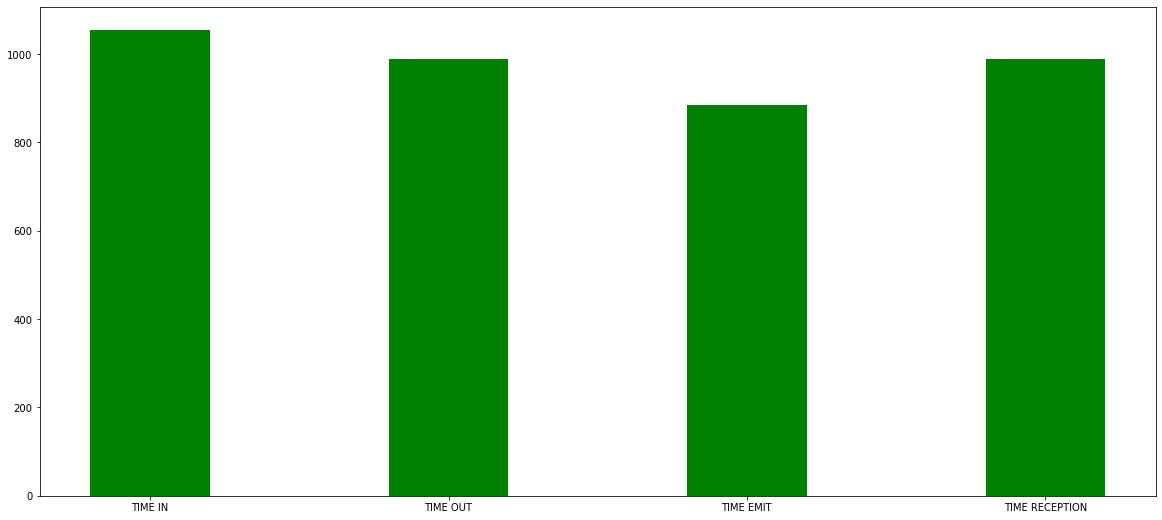

In [203]:
time_in = df ['time_in'].tolist ()
time_out = df ['time_out'].tolist ()
time_emit = df ['time_emit'].tolist ()
time_reception = df ['time_reception'].tolist ()
mean_time_in = sum (time_in) // len (time_in)
mean_time_out = sum (time_out) // len (time_out)
mean_time_emit = sum (time_emit) // len (time_emit)
mean_time_reception = sum (time_reception) // len (time_reception)

data = []
dataValue = []

data.append (mean_time_in)
data.append (mean_time_reception)
data.append (mean_time_emit)
data.append (mean_time_reception)

dataValue.append ('TIME IN')
dataValue.append ('TIME OUT')
dataValue.append ('TIME EMIT')
dataValue.append ('TIME RECEPTION')

figure = plt.figure (figsize = (20, 9))
plt.bar (dataValue, data, color='green', width = 0.4)
plt.show ()

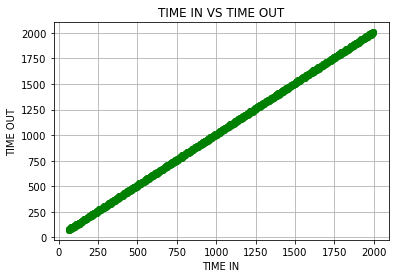

In [206]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker='o', color = 'green')
plt.xlabel ('TIME IN')
plt.ylabel ('TIME OUT')
plt.title ('TIME IN VS TIME OUT')
plt.grid (True)
plt.show ()

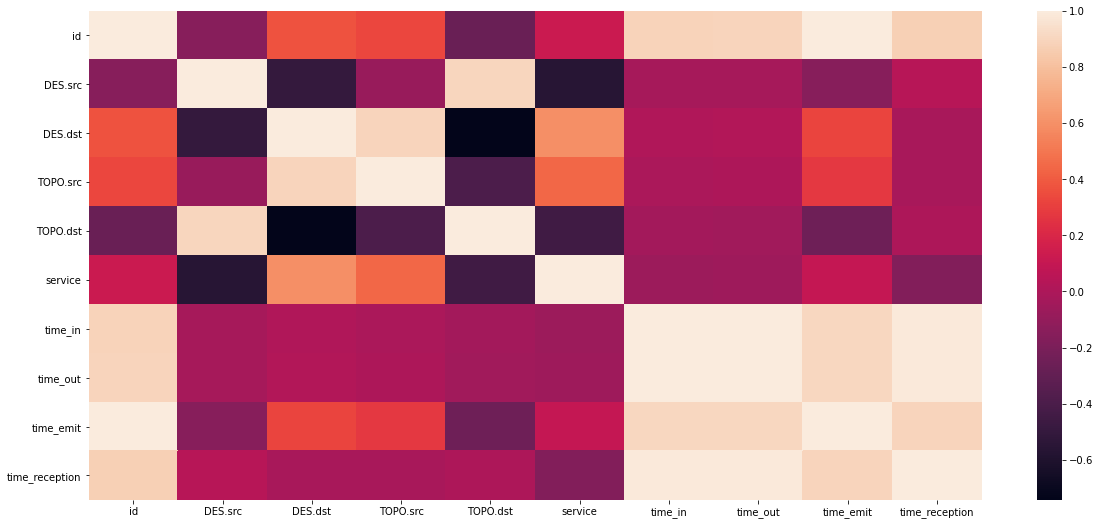

In [208]:
figure = plt.figure (figsize = (20, 9))
dataplot = heatmap (resource_aware.corr())
plt.show ()